# Importamos librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import missingno as msno
import seaborn as sns
from scipy import stats

import psycopg2
from psycopg2 import sql
import sys 
import os
from dotenv import load_dotenv
from datetime import datetime

import warnings

# Ignora el warning de pandas + psycopg2
warnings.filterwarnings("ignore", message="pandas only supports SQLAlchemy*")

# Ignora el warning de los emojis en gráficos
warnings.filterwarnings("ignore", message="Glyph 128200*")

# importamos las funciones de soporte en la carpeta src
# Añadir carpeta src al path
sys.path.append(os.path.abspath("../src"))  
from soporte_query import get_connection,get_variaciones_df,get_market_cap_df,get_market_cap_df,get_variaciones_df,get_fundamentales_df,get_resumen_inversion_df,get_fundamentales_sector_df,get_promedios_var_annual_por_sector,get_indicadores_tecnicos_filtrados,get_volatilidad_por_sector,get_decisiones_por_sector,get_volumen_mensual_por_sector,get_volatilidad_empresas_claves,get_rotacion_sectorial_trimestral,get_retornos_anuales_por_sector,evaluar_efectividad_rsi,evaluar_efectividad_rsi_alto,get_sma_y_precios_empresas_clave,get_precios_sectoriales

# 01. Análisis Univariado

## 01. 01 📈 Análisis de la Evolución de la Capilizacion de mercado de las 5 empresas mas importantes

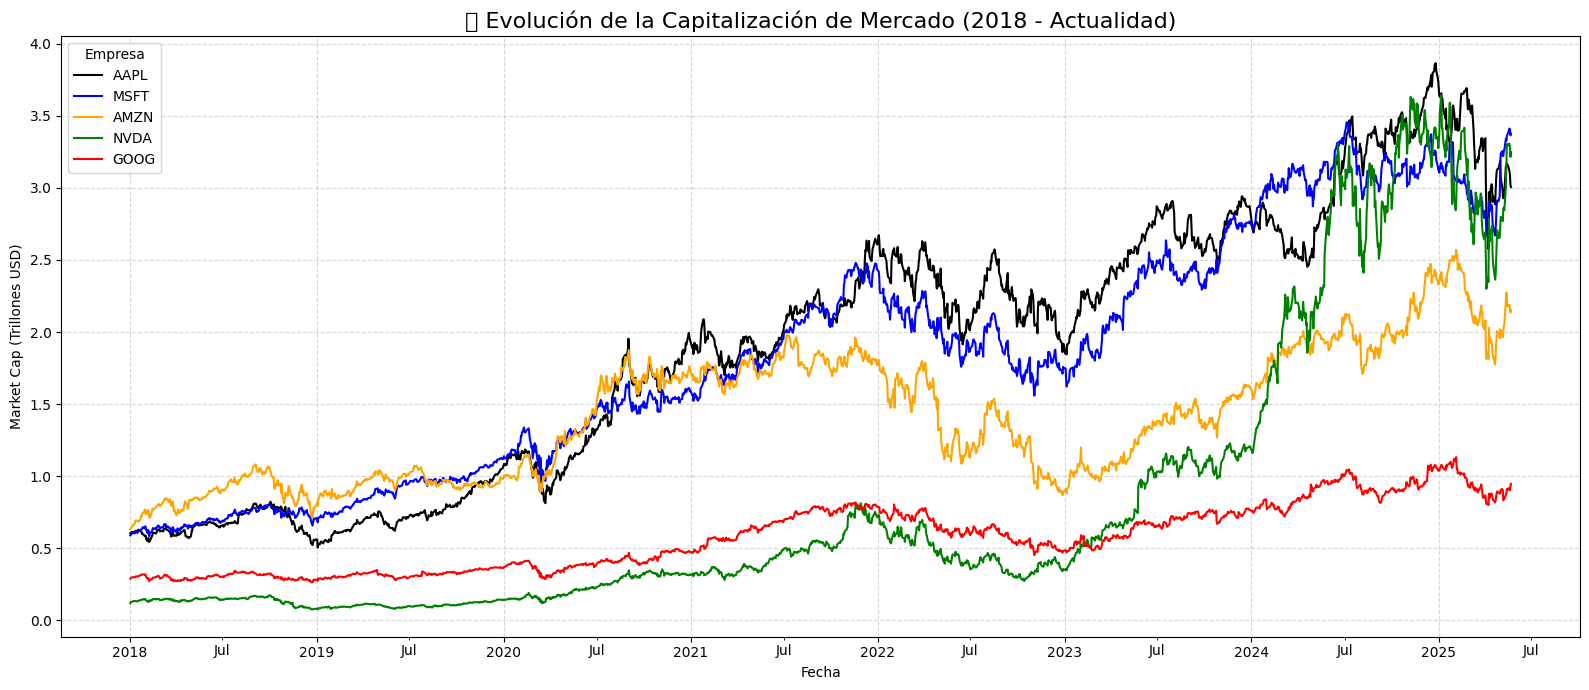

In [26]:
# Query SQL donde se realiza un JOIN entre la tabla precios_historicos y la tabla indicadores_fundamentales.
df_market_cap = get_market_cap_df()  # Usamos la función con SQL LEFT JOIN

# ✅ Paso 2: Asegurar formato de fecha y tipos numéricos
df_market_cap['date'] = pd.to_datetime(df_market_cap['date'])
df_market_cap['market_cap'] = df_market_cap['market_cap'].astype(float)

# ✅ Paso 3: Filtrar por fecha desde 2018 y ordenar por ticker y fecha
df_filtrado = df_market_cap[df_market_cap['date'] >= '2018-01-01'].copy()
df_filtrado = df_filtrado.sort_values(by=['ticker', 'date'])

# ✅ Paso 4: Graficar evolución del Market Cap
tickers = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOG']
colores = {
    'AAPL': 'black',
    'MSFT': 'blue',
    'AMZN': 'orange',
    'NVDA': 'green',
    'GOOG': 'red'
}

plt.style.use("default")
sns.set_palette("colorblind")
plt.figure(figsize=(16, 7))

for ticker in tickers:
    datos = df_filtrado[df_filtrado['ticker'] == ticker]
    plt.plot(
        datos['date'],
        datos['market_cap'] / 1e12,
        label=ticker,
        color=colores[ticker],
        linewidth=1.5
    )

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

plt.title('📈 Evolución de la Capitalización de Mercado (2018 - Actualidad)', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Market Cap (Trillones USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Empresa", loc='upper left')
plt.tight_layout()
plt.show()


## 📈 Evolución de la Capitalización de Mercado (2018 - Actualidad)

Se presenta la evolución histórica de la capitalización bursátil de cinco gigantes tecnológicas: **Apple (AAPL)**, **Microsoft (MSFT)**, **Amazon (AMZN)**, **Nvidia (NVDA)** y **Alphabet/Google (GOOG)**, calculada como:

> `Market Cap = Precio de Cierre × Acciones en Circulación`

Los valores están expresados en **trillones de dólares (USD)**, con series temporales desde enero de 2018 hasta mayo de 2025.

---

### 🔍 Observaciones Clave

#### ⚫ Apple (AAPL)
- Crecimiento estable y continuo durante todo el período.
- Supera los **3T USD** desde 2022 y mantiene ese nivel con relativa estabilidad.
- Refleja una confianza constante del mercado en su modelo de negocio diversificado.

#### 🟦 Microsoft (MSFT)
- Similar a Apple, mantiene un crecimiento sostenido y consistente.
- También supera los **3T USD** en 2024, impulsado por su liderazgo en servicios en la nube y avances en IA empresarial.
- Muestra menos volatilidad relativa frente a sus pares.

#### 🟧 Amazon (AMZN)
- Alcanza su punto máximo en 2021 cerca de los **2T USD**, para luego experimentar una caída pronunciada en 2022.
- La recuperación a partir de 2023 es más gradual, reflejando sensibilidad a condiciones macroeconómicas.
- Las presiones inflacionarias y de logística impactaron su valuación post-pandemia.

#### 🟩 Nvidia (NVDA)
- Exhibe el comportamiento más explosivo del grupo.
- En menos de dos años (2023–2024) pasa de **~0.5T a más de 3.5T USD**.
- Su capitalización se dispara por el auge de la inteligencia artificial y la demanda global de GPUs.
- Es la acción más volátil en el gráfico.

#### 🟥 Google (GOOG)
- Evolución más contenida comparada con el resto.
- Se mantiene entre **0.3T y 1.5T USD** con incrementos graduales y moderados.
- Posiblemente afectada por la competencia publicitaria, restricciones regulatorias y menores expectativas de crecimiento.

---

### 📊 Tendencias Generales

- Se observan **picos en 2021**, una **corrección clara en 2022**, y una **recuperación entre 2023 y 2024**.
- La capitalización de las empresas refleja no solo fundamentos propios, sino también el impacto de **eventos macroeconómicos globales** (pandemia, inflación, subas de tasas).
- **Nvidia rompe el patrón** con un rally excepcional ligado directamente al auge de la IA.

---

### 🎯 Conclusión

Este análisis permite visualizar el **peso de cada empresa en el mercado**, identificar **cambios estructurales** y entender cómo diferentes factores impactan el valor percibido de las grandes tecnológicas.  
- **Apple y Microsoft** destacan por su estabilidad y liderazgo sostenido.  
- **Amazon y Google**, más sensibles a factores externos.  
- **Nvidia**, ejemplo claro de un nuevo ciclo de crecimiento acelerado impulsado por innovación tecnológica.



## 📊 01. 02 -  Análisis de la Distribución de Retornos Diarios (2018 - Actualidad)

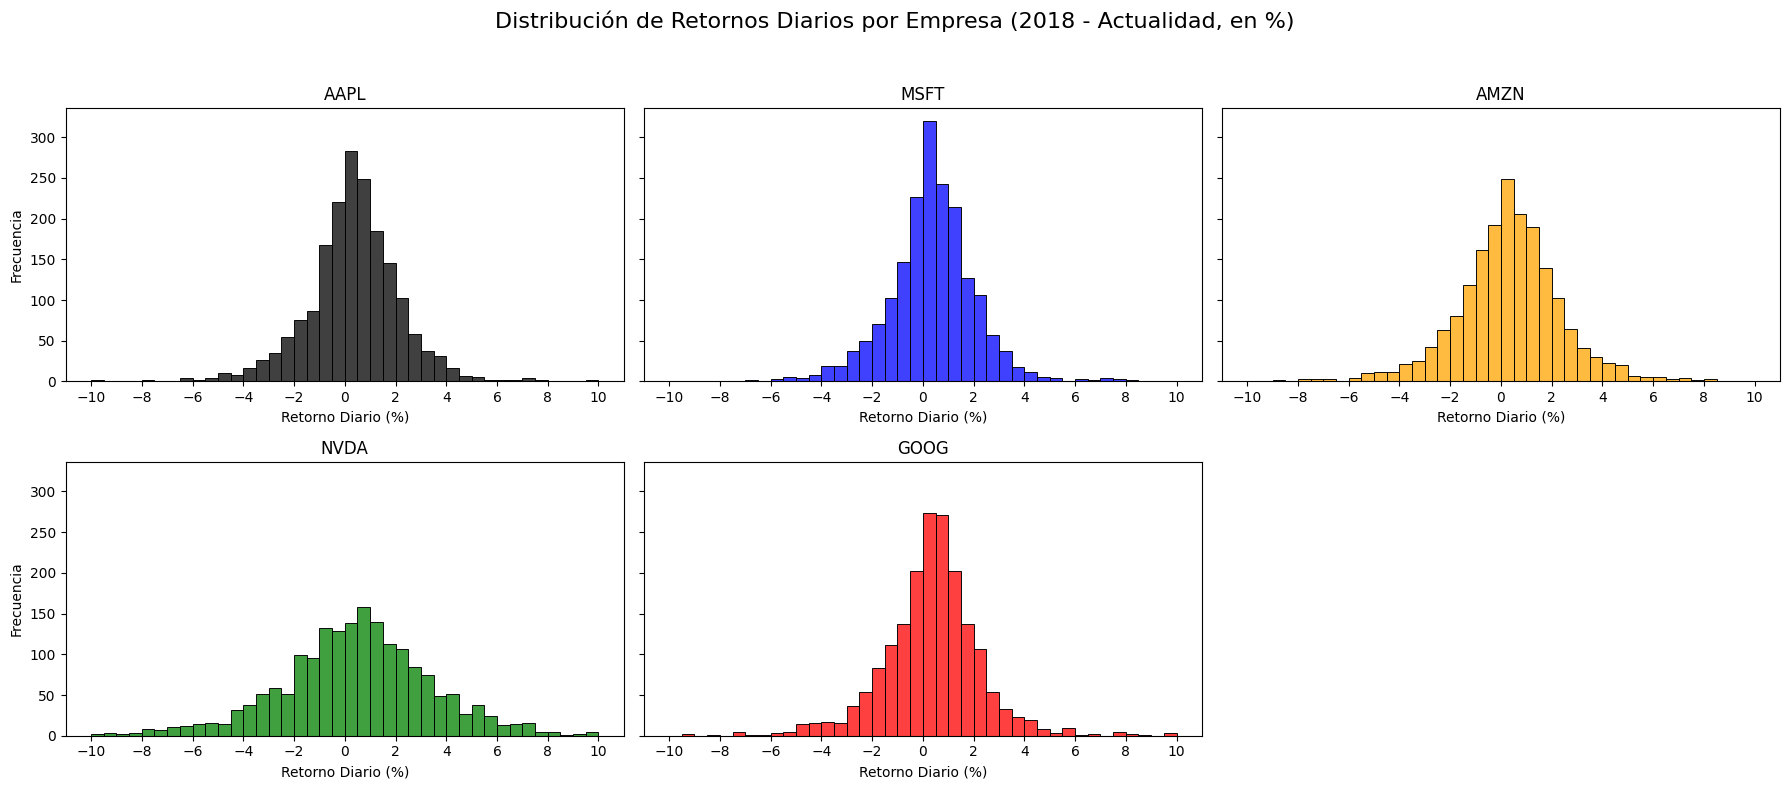

In [3]:
# funcion para obtener las variaciones diarias de precios en la base de datos

variaciones_df = get_variaciones_df()

# Configuración
plt.style.use("default")
tickers = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOG']
colores = {
    'AAPL': 'black',
    'MSFT': 'blue',
    'AMZN': 'orange',
    'NVDA': 'green',
    'GOOG': 'red'
}

# Filtrado y transformación de datos
variaciones_filtradas = variaciones_df[
    (variaciones_df['ticker'].isin(tickers)) &
    (variaciones_df['date'] >= '2018-01-01')
].copy()

# Retorno diario redondeado a 0.5% (en porcentaje)
variaciones_filtradas["var_daily_pct_rounded"] = (
    (variaciones_filtradas["var_daily"] * 100) / 0.5
).round() * 0.5

# Bins de -10% a +10% en intervalos de 0.5%
bins_pct = np.arange(-10, 10.5, 0.5)

# Crear figura y subplots 3x2
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharey=True)
axes = axes.flatten()

# Dibujar un histograma por ticker
for i, ticker in enumerate(tickers):
    datos = variaciones_filtradas[variaciones_filtradas["ticker"] == ticker]
    sns.histplot(
        data=datos,
        x="var_daily_pct_rounded",
        bins=bins_pct,
        color=colores[ticker],
        ax=axes[i]
    )
    axes[i].set_title(ticker)
    axes[i].set_xlabel("Retorno Diario (%)")
    axes[i].set_xticks(np.arange(-10, 11, 2))
    if i % 3 == 0:
        axes[i].set_ylabel("Frecuencia")
    else:
        axes[i].set_ylabel("")

# Eliminar el subplot vacío si hay menos de 6 empresas
if len(tickers) < len(axes):
    fig.delaxes(axes[-1])

# Título y layout final
plt.suptitle("Distribución de Retornos Diarios por Empresa (2018 - Actualidad, en %)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 📊 Análisis de la Distribución de Retornos Diarios (2018 - Actualidad)

Se graficaron los retornos diarios redondeados a 0.5% para las empresas **AAPL**, **MSFT**, **AMZN**, **NVDA** y **GOOG**, en escala de porcentaje y con bins consistentes. A continuación, se destacan las observaciones más relevantes por empresa:

---

### ⚫ Apple (AAPL)
- Presenta una **distribución simétrica y compacta**, centrada cerca del 0%.
- Poca frecuencia de eventos extremos.
- Confirma su comportamiento **estable y defensivo**.

---

### 🟦 Microsoft (MSFT)
- Perfil muy similar al de Apple: distribución concentrada y bajo riesgo.
- Leves colas hacia ±6%, pero rara vez ocurren.
- Refleja su estabilidad como empresa consolidada en el mercado.

---

### 🟧 Amazon (AMZN)
- Distribución levemente **más dispersa** que AAPL y MSFT.
- Colas más extendidas hacia +8% y -8%.
- Muestra algo más de volatilidad, especialmente en entornos macroeconómicos tensos (e.g. 2022).

---

### 🟩 Nvidia (NVDA)
- Claramente la **más volátil del grupo**.
- Retornos frecuentes entre ±5%, con eventos que superan ±8%.
- Curva **más achatada y ancha**, lo que indica dispersión alta.
- Alineado con su perfil de crecimiento agresivo y especulación ligada a la IA.

---

### 🟥 Alphabet (GOOG)
- Distribución intermedia: más ancha que MSFT/AAPL, pero más contenida que NVDA.
- Retornos fuera del centro algo más frecuentes (±4% a ±6%).
- Refleja su exposición tanto a ciclos tecnológicos como publicitarios.

---

## 🎯 Conclusiones Generales

- **AAPL y MSFT** → las más estables, ideales para perfiles conservadores.
- **NVDA** → mayor volatilidad y riesgo, pero con potencial de subas explosivas.
- **AMZN y GOOG** → intermedios en términos de dispersión.
- Esta información es clave para evaluar **riesgo asociado** a cada acción en contextos de inversión o trading.


## 01. 04 📊 Fundamentales

In [4]:
def get_fundamentales_df():
    query = """
    SELECT *
    FROM indicadores_fundamentales;
    """
    conn = get_connection()
    df = pd.read_sql_query(query, conn)
    conn.close()
    
    return df

fundamentales_df = get_fundamentales_df()

# Columnas a analizar
columnas_interes = [
    "per", "roe", "eps_growth_yoy",
    "deuda_patrimonio", "margen_neto",
    "dividend_yield", "market_cap"
]


# Verificar tipos de datos y estadísticas
fundamentales_df[columnas_interes].info(), fundamentales_df[columnas_interes].describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   per               476 non-null    float64
 1   roe               472 non-null    float64
 2   eps_growth_yoy    442 non-null    float64
 3   deuda_patrimonio  445 non-null    float64
 4   margen_neto       500 non-null    float64
 5   dividend_yield    409 non-null    float64
 6   market_cap        500 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 27.5 KB


(None,
                per         roe  eps_growth_yoy  deuda_patrimonio  margen_neto  \
 count   476.000000  472.000000      442.000000        445.000000   500.000000   
 mean     37.937913    0.313662        0.212136        144.777861     0.138265   
 std     110.257071    0.996639        1.420059        321.794911     0.145823   
 min       5.222826   -1.632120       -0.985000          0.543000    -1.056660   
 25%      16.650069    0.089610       -0.171000         39.432000     0.070695   
 50%      24.487278    0.159205        0.050500         74.627000     0.126370   
 75%      34.448620    0.291732        0.223000        146.144000     0.199008   
 max    2254.500000   16.057690       15.891000       4789.603000     0.765870   
 
        dividend_yield    market_cap  
 count      409.000000  5.000000e+02  
 mean         2.413814  1.091787e+11  
 std          1.657299  3.208449e+11  
 min          0.030000  6.311868e+09  
 25%          1.130000  1.894201e+10  
 50%          2.090

### 📊 **Insights Clave del Análisis de Datos Financieros**

#### 1. **PER (Price to Earnings Ratio)**
- **Media**: 37.9  
- **Mediana**: 24.5  
- **Máximo**: 2254.5  
- **Mínimo**: 5.2  
- 🔍 **Insight**: Valores extremos distorsionan el promedio. Hay empresas con PER muy alto, probablemente por bajos beneficios o especulación. 

#### 2. **ROE (Return on Equity)**
- **Media**: 0.31 (31%)  
- **Mediana**: 0.16 (16%)  
- **Máximo**: 16.06  
- **Mínimo**: -1.63  
- 🔍 **Insight**: Buen nivel promedio de rentabilidad, pero hay casos extremos negativos que indican destrucción de valor. Útil para clasificar empresas según eficiencia en generar beneficios sobre el capital.

#### 3. **EPS Growth YoY (Crecimiento interanual del EPS)**
- **Media**: 0.21  
- **Mediana**: 0.05  
- **Máximo**: 15.89  
- **Mínimo**: -0.99  
- 🔍 **Insight**: Hay fuerte asimetría y algunos valores fuera de escala. La mediana muestra que la mayoría crece moderadamente.

#### 4. **Deuda/Patrimonio**
- **Media**: 144.77  
- **Mediana**: 74.63  
- **Máximo**: 4789.6  
- **Mínimo**: 0.54  
- 🔍 **Insight**: Algunos niveles de apalancamiento son extremadamente altos. Indica empresas muy endeudadas y posiblemente frágiles financieramente.

#### 5. **Margen Neto**
- **Media**: 13.8%  
- **Mediana**: 12.6%  
- **Máximo**: 76.6%  
- **Mínimo**: -105.7%  
- 🔍 **Insight**: Márgenes sólidos en general, pero algunas empresas operan con pérdidas severas. Estos casos extremos pueden distorsionar promedios.

#### 6. **Dividend Yield**
- **Media**: 2.41%  
- **Mediana**: 2.09%  
- **Máximo**: 9.74%  
- **Mínimo**: 0.03%  
- **Faltantes**: 91 valores (18.2%)  
- 🔍 **Insight**: Amplia dispersión. Algunas empresas no distribuyen dividendos, otras tienen rendimientos elevados. El porcentaje de valores faltantes sugiere cuidado al usar esta variable en modelos.

#### 7. **Market Cap (Capitalización bursátil)**
- **Media**: $109B  
- **Mediana**: $36B  
- **Máximo**: $3.37T  
- **Mínimo**: $6.3B  
- 🔍 **Insight**: El promedio está altamente sesgado por gigantes del mercado.



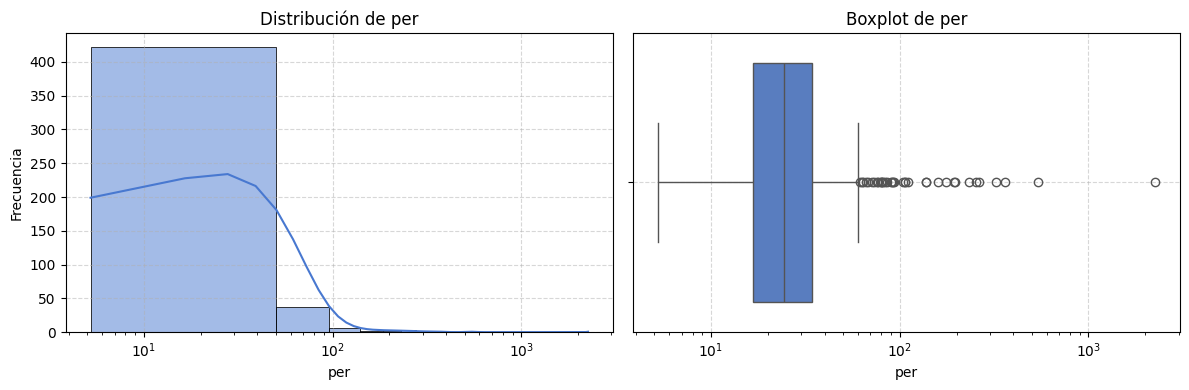

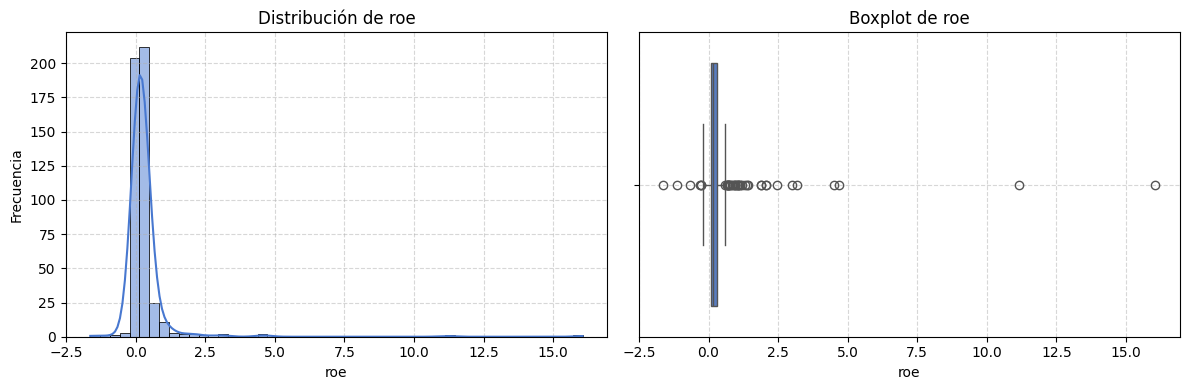

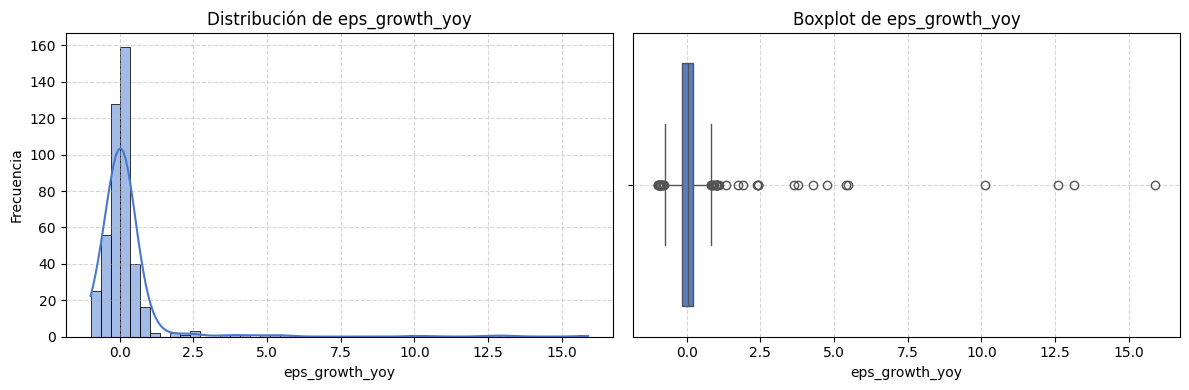

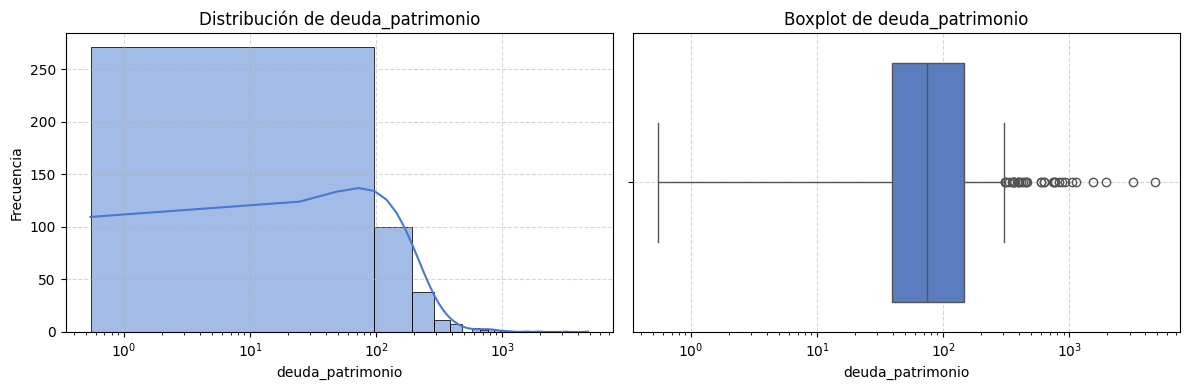

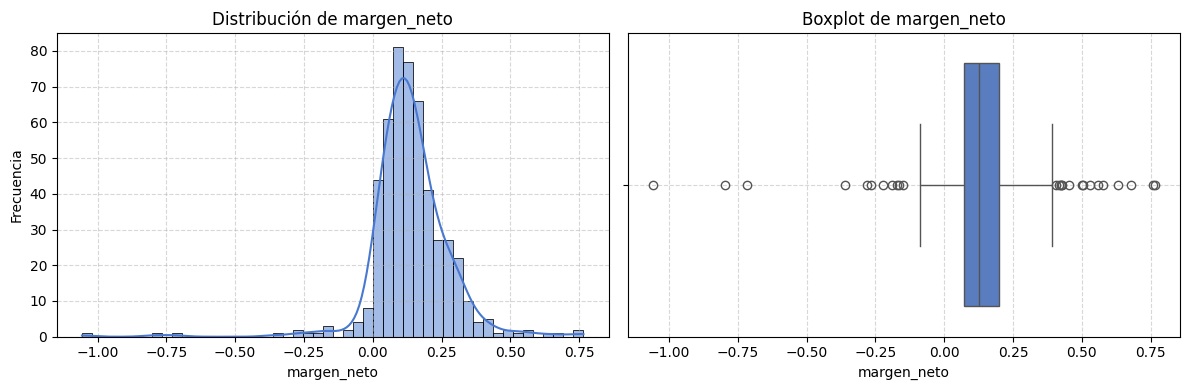

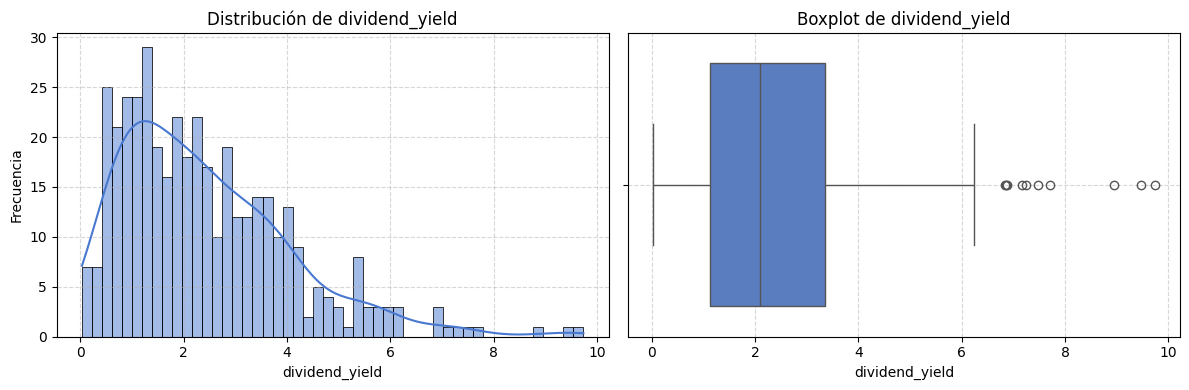

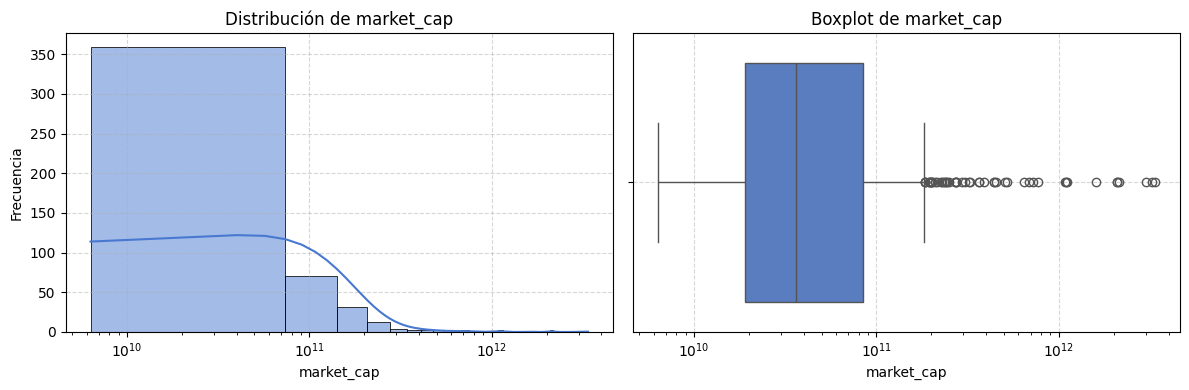

In [5]:

# Lista de indicadores a graficar
indicadores = [
    ("per", True),
    ("roe", False),
    ("eps_growth_yoy", False),
    ("deuda_patrimonio", True),
    ("margen_neto", False),
    ("dividend_yield", False),
    ("market_cap", True)
]

# Estilo general
plt.style.use("default")
sns.set_palette("muted")

# Crear gráficos
for indicador, usar_log in indicadores:
    data = fundamentales_df[indicador].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma
    sns.histplot(data, kde=True, ax=axes[0], bins=50)
    axes[0].set_title(f"Distribución de {indicador}")
    if usar_log:
        axes[0].set_xscale("log")
    axes[0].set_xlabel(indicador)
    axes[0].set_ylabel("Frecuencia")
    axes[0].grid(True, linestyle="--", alpha=0.5)

    # Boxplot
    sns.boxplot(x=data, ax=axes[1])
    axes[1].set_title(f"Boxplot de {indicador}")
    if usar_log:
        axes[1].set_xscale("log")
    axes[1].set_xlabel(indicador)
    axes[1].grid(True, linestyle="--", alpha=0.5)

    plt.tight_layout()
    plt.show()



## 📊 Análisis Univariado de Indicadores Fundamentales

Se analizaron 6 indicadores fundamentales clave para evaluar la salud financiera y la valoración relativa de las empresas del dataset. A continuación, se resumen las observaciones más relevantes de cada métrica:

---

### 💰 PER (Price to Earnings Ratio)
##### Cuántas veces los inversores están pagando por las ganancias de la empresa.     | Precio de la acción ÷ Ganancias por acción.
- Distribución extremadamente **sesgada a la derecha**, con algunos valores fuera de escala (>1000).
- La mayoría de las empresas tienen un PER razonable (entre 10 y 50).
- Outliers extremos pueden deberse a ingresos muy bajos o pérdidas momentáneas.
- **Escala logarítmica** fue necesaria para visualizarlo correctamente.

---

### 📈 ROE (Return on Equity)
#### Cuánto beneficio genera la empresa por cada unidad de capital.                 | Utilidad Neta ÷ Patrimonio Neto.
- La mayoría de los valores se agrupan entre 0% y 1%, pero hay valores atípicos hasta 16x.
- **Distribución asimétrica positiva**.
- Muchos valores cercanos a cero o negativos, lo cual podría indicar empresas no rentables o muy apalancadas.
- Fuertes outliers que deben analizarse con más contexto.

---

### 📊 EPS Growth YoY (Crecimiento del Beneficio por Acción Anual)
####  Qué tanto crecieron las ganancias por acción en el último año.                 | (EPS actual − EPS año anterior) ÷ EPS año anterior.
- Gran concentración cercana a 0, pero con valores que van hasta 15x.
- Muchas empresas con **crecimiento negativo o muy bajo**.
- Algunos outliers marcan crecimientos excepcionales.
- Métrica volátil que requiere limpieza si se usa para modelado.

---

### 🏦 Deuda / Patrimonio
####  Nivel de endeudamiento de la empresa.                                          | Total Deuda ÷ Patrimonio Neto.      
- Muy dispersa, **con casos extremos de apalancamiento** (hasta 3000%).
- Alta frecuencia de valores moderados (10–100), pero fuerte cola a la derecha.
- Escala logarítmica utilizada para evitar distorsión.
- Empresas muy endeudadas pueden estar en sectores capital-intensivos o en dificultades financieras.

---

### 📉 Margen Neto
#### Porcentaje de cada dólar de ventas que se convierte en ganancia.               | Utilidad Neta ÷ Ventas Totales.
- Distribución centrada cerca de 0.15 (15%) con **simetría razonable**.
- Algunos márgenes negativos significativos (< -50%), indicando pérdidas.
- Margen estable en la mayoría, pero con outliers tanto positivos como negativos.
- Útil para evaluar eficiencia operativa relativa.

---

### 💵 Dividend Yield
####  Rendimiento del dividendo respecto al precio de la acción.                     | Dividendo Anual ÷ Precio de la Acción.      
- La mayoría de las empresas ofrecen entre **0% y 5% de dividendos**.
- Distribución sesgada a la derecha.
- Algunos casos de yields extremos (>8%) podrían reflejar caídas en precio o situaciones especiales.
- Boxplot muestra una mediana entre 2% y 3%.

---

## 🧩 Conclusiones Generales

- Las métricas más **volátiles y propensas a outliers** son PER, EPS Growth y Deuda/Patrimonio.
- **Dividend Yield y Margen Neto** muestran mayor estabilidad y menor dispersión.
- El uso de escalas logarítmicas es esencial para representar indicadores como PER y Deuda/Patrimonio.
- Estos insights son útiles para:
  - Filtrado inicial de empresas para inversión.
  - Segmentación según perfil financiero.
  - Preparación de features para modelos predictivos.



C:\Users\Agus\AppData\Local\Temp\ipykernel_17512\2459435100.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo_caps.index, y=conteo_caps.values, palette="viridis")


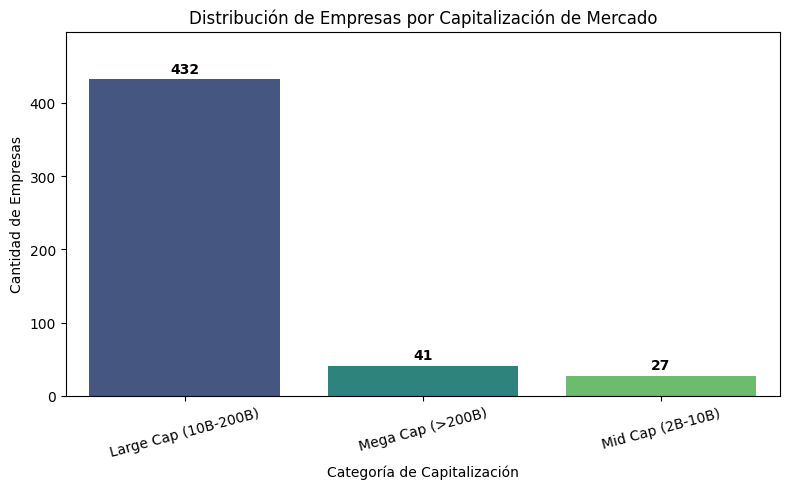

In [6]:
# Cargar archivo nuevamente
fundamentales_df = get_fundamentales_df()

# Convertir Market Cap de millones a miles de millones
fundamentales_df["Market Cap (B)"] = fundamentales_df["market_cap"] / 1e9  # NO 1e3

# Clasificar empresas según capitalización de mercado (en miles de millones)
def clasificar_market_cap(valor):
    if valor < 2:
        return "Small Cap (<2B)"
    elif 2 <= valor < 10:
        return "Mid Cap (2B-10B)"
    elif 10 <= valor < 200:
        return "Large Cap (10B-200B)"
    else:
        return "Mega Cap (>200B)"
    
fundamentales_df["Cap Group"] = fundamentales_df["Market Cap (B)"].apply(clasificar_market_cap)

# Contar empresas por categoría
conteo_caps = fundamentales_df["Cap Group"].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=conteo_caps.index, y=conteo_caps.values, palette="viridis")

# Agregar etiquetas arriba de cada barra
for i, value in enumerate(conteo_caps.values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Estética
plt.title("Distribución de Empresas por Capitalización de Mercado")
plt.ylabel("Cantidad de Empresas")
plt.xlabel("Categoría de Capitalización")
plt.xticks(rotation=15)


# Eliminar límites automáticos si querés que se ajuste al contenido
plt.ylim(0, max(conteo_caps.values) * 1.15)  # Deja un poco de espacio arriba para las etiquetas

plt.tight_layout()
plt.show()



## 📊 Análisis: Distribución de Empresas por Capitalización de Mercado

Este gráfico representa la cantidad de empresas clasificadas por su capitalización bursátil (Market Cap) en billones de dólares estadounidenses (USD). Las categorías están definidas según rangos de tamaño de mercado ampliamente aceptados.

---

### 📌 Categorías y Resultados

| Categoría              | Rango de Capitalización   | Nº de Empresas |
|------------------------|----------------------------|----------------|
| **Large Cap**          | 10B–200B USD               | **432**        |
| **Mega Cap**           | >200B USD                  | **41**         |
| **Mid Cap**            | 2B–10B USD                 | **27**         |
| **Small Cap**          | <2B USD                    | *No representada* |

---

### 🔍 Observaciones Relevantes

- La mayoría de las empresas (**~87%**) se concentran en la categoría **Large Cap**, lo que indica un universo corporativo dominado por compañías consolidadas y de gran escala.
- Solo **41 empresas** superan los 200 mil millones USD en capitalización, calificando como **Mega Cap**, un grupo altamente selecto.
- Las **Mid Cap** representan una pequeña fracción del conjunto, con **27 empresas** entre 2 y 10 mil millones USD.
- La **ausencia de Small Caps** sugiere que:
  - están fuera del universo de estudio ya que se trata de las 500 empresas mas grande.

---

### 🧠 Interpretación

Esta distribución sugiere un enfoque analítico o inversor orientado hacia empresas **grandes, estables y consolidadas**, con menor exposición a firmas de menor capitalización que suelen tener mayor volatilidad, pero también más potencial de crecimiento.

---

### 🎯 Conclusión

El panorama revela un sesgo hacia empresas de gran tamaño, lo que puede beneficiar análisis enfocados en estabilidad, poder de mercado y liderazgo sectorial, pero limita la visión de oportunidades emergentes en los tramos más bajos del espectro de capitalización.


## ⚙️ 01.05 Análisis del Resumen de Inversión

C:\Users\Agus\AppData\Local\Temp\ipykernel_17512\2092439802.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=decision_counts.index, y=decision_counts.values, palette=colores_barras)


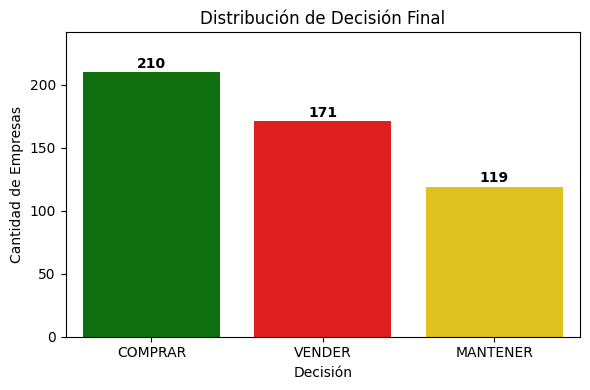

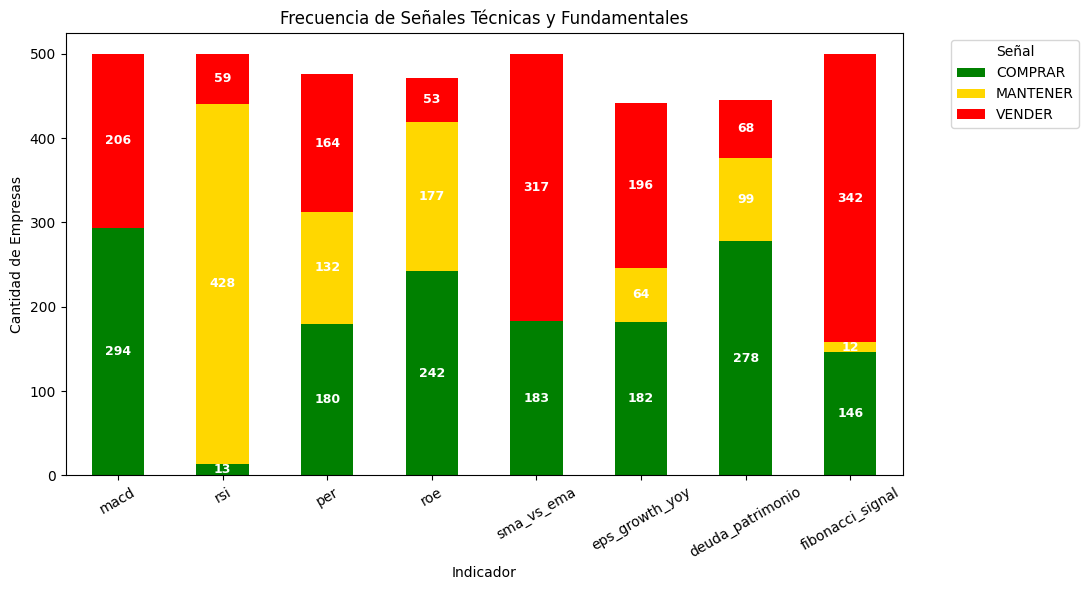

In [7]:
resumen_inversion_df = get_resumen_inversion_df()

# 1. Distribución de la Decisión Final
decision_counts = resumen_inversion_df["decision_final"].value_counts()

# Colores personalizados por decisión
colores = {
    "COMPRAR": "green",
    "VENDER": "red",
    "MANTENER": "gold"
}

# Obtener los colores en el orden correcto
colores_barras = [colores.get(decision, "gray") for decision in decision_counts.index]

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=decision_counts.index, y=decision_counts.values, palette=colores_barras)

# Agregar etiquetas de cantidad arriba de cada barra
for i, value in enumerate(decision_counts.values):
    ax.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Estética
plt.title("Distribución de Decisión Final")
plt.ylabel("Cantidad de Empresas")
plt.xlabel("Decisión")
plt.ylim(0, max(decision_counts.values) * 1.15)  # Deja espacio arriba
plt.tight_layout()
plt.show()


# -----------------------------------------------------
# 2. Frecuencia de señales técnicas y fundamentales (incluye Fibonacci)
# -----------------------------------------------------

mapa_fibonacci = {
    "SOPORTE": "COMPRAR",
    "RESISTENCIA": "VENDER",
    "NEUTRO": "MANTENER"
}
resumen_inversion_df["fibonacci_signal"] = resumen_inversion_df["estado_fibonacci"].map(mapa_fibonacci)

columnas_senales = [
    "macd", "rsi", "per", "roe", "sma_vs_ema",
    "eps_growth_yoy", "deuda_patrimonio", "fibonacci_signal"
]

# Calcular conteos por valor de señal (COMPRAR, VENDER, MANTENER)
conteos = resumen_inversion_df[columnas_senales].apply(lambda col: col.value_counts()).fillna(0)

# Asegurar orden de señales
conteos = conteos.reindex(['COMPRAR', 'MANTENER', 'VENDER'])

# Colores personalizados
colores = {
    'COMPRAR': 'green',
    'MANTENER': 'gold',
    'VENDER': 'red'
}

# Gráfico apilado con colores definidos
fig, ax = plt.subplots(figsize=(11, 6))
conteos.T.plot(kind='bar', stacked=True, ax=ax, color=[colores[s] for s in conteos.index])

# Agregar valores en cada barra apilada
for idx, indicador in enumerate(conteos.columns):
    base = 0
    for señal in conteos.index:
        valor = conteos.loc[señal, indicador]
        if valor > 0:
            ax.text(idx, base + valor / 2, int(valor), ha='center', va='center', color='white', fontsize=9, fontweight='bold')
            base += valor

# Estética
plt.title("Frecuencia de Señales Técnicas y Fundamentales")
plt.ylabel("Cantidad de Empresas")
plt.xlabel("Indicador")
plt.xticks(rotation=30)
plt.legend(title="Señal", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 📊 Análisis de Señales y Decisión Final

Este análisis se fundamenta en dos visualizaciones clave que resumen tanto la **decisión final de inversión** (COMPRAR, MANTENER, VENDER) como la **frecuencia de señales** emitidas por distintos indicadores técnicos y fundamentales.

---

### 📌 1. Distribución de la Decisión Final

| Decisión    | Empresas |
|-------------|----------|
| **COMPRAR** | 210      |
| **VENDER**  | 171      |
| **MANTENER**| 119      |

- La mayoría de las recomendaciones apuntan a **COMPRAR**, lo que sugiere un contexto de mercado optimista o con oportunidades detectadas.
- **VENDER** sigue de cerca, representando un tercio de los casos.
- **MANTENER** es la menos frecuente, lo que indica que el sistema evita decisiones tibias y busca tomar posición clara.

---

### 📊 2. Frecuencia de Señales Técnicas y Fundamentales

| Indicador            | COMPRAR | MANTENER | VENDER |
|----------------------|---------|----------|--------|
| **macd**             | 294     | —        | 206    |
| **rsi**              | 13      | 428      | 59     |
| **per**              | 180     | 132      | 164    |
| **roe**              | 242     | 177      | 53     |
| **sma_vs_ema**       | 183     | —        | 317    |
| **eps_growth_yoy**   | 182     | 64       | 196    |
| **deuda_patrimonio** | 278     | 99       | 68     |
| **fibonacci_signal** | 146     | 12       | 342    |

#### 🧠 Observaciones:
- **MACD** es una fuente potente de señales de compra (294), aunque también aporta un número considerable de señales de venta.
- **RSI** muestra el perfil más neutral con 428 recomendaciones de **mantener**, indicando una sobreposición de empresas en zona gris o de consolidación.
- **PER** está bien repartido entre las tres categorías, lo que refleja su sensibilidad al contexto sectorial o de valuación.
- **ROE** es fuertemente positivo (242), señalando que muchas empresas presentan buena rentabilidad sobre el capital.
- **SMA vs EMA** y **Fibonacci Signal** son indicadores marcadamente bajistas con 317 y 342 señales de **vender** respectivamente.
- **Deuda/Patrimonio** es mayormente alcista, sugiriendo estructuras de capital sanas en muchas compañías.
- **EPS Growth YoY** también tiene una polarización, pero más equilibrada entre compra y venta.

---

### 🎯 Conclusión

- El sistema actual muestra una **ligera inclinación hacia decisiones de compra**, con una proporción importante de señales claras (pocas empresas en la zona de mantener).
- Los indicadores técnicos como **MACD**, **SMA vs EMA** y **Fibonacci** tienden a extremos, funcionando como catalizadores de decisiones fuertes.
- Los indicadores fundamentales (como **ROE**, **PER**, y **Deuda/Patrimonio**) aportan señales más variadas, matizando el análisis técnico.
- En conjunto, se sugiere un enfoque balanceado pero con tendencia proactiva, ideal para detectar movimientos rápidos en mercados volátiles o de rotación sectorial.

---


# 02. Análisis Bivariado

## 🔁 02.01 Matriz de Correlación entre Indicadores Fundamentales

C:\Users\Agus\AppData\Local\Temp\ipykernel_17512\3058815109.py:18: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Agus\Desktop\PFM\Proyecto_Final\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


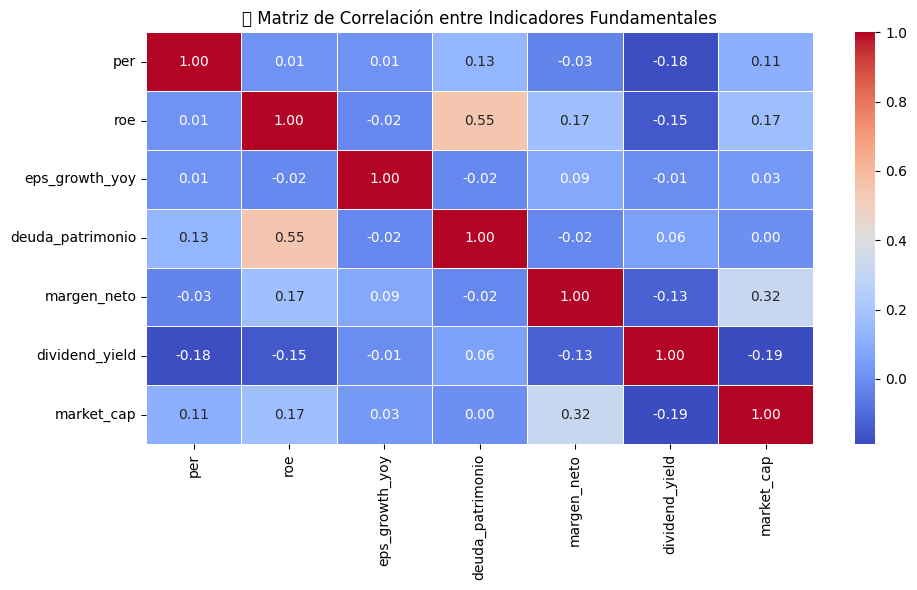

In [8]:
# Cargar archivo nuevamente
fundamentales_df = get_fundamentales_df()
# Columnas a analizar
fund_cols = [
    "per", "roe", "eps_growth_yoy",
    "deuda_patrimonio", "margen_neto",
    "dividend_yield", "market_cap"
]
# Limpiar datos
df_corr = fundamentales_df[fund_cols].dropna()

corr_matrix = df_corr.corr()

# Graficar
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("🔁 Matriz de Correlación entre Indicadores Fundamentales")
plt.tight_layout()
plt.show()


## 🔗 Matriz de Correlación entre Indicadores Fundamentales

La matriz de correlación evalúa la relación lineal entre distintos indicadores financieros clave. Los valores oscilan entre **-1 (correlación negativa perfecta)** y **+1 (positiva perfecta)**, con colores que representan la intensidad de dichas relaciones.

---

### 📌 Correlaciones Destacadas

#### 📈 Correlaciones positivas relevantes:
- **ROE y deuda/patrimonio** → `0.55`  
  Las empresas con mayor rentabilidad sobre el capital suelen tener más apalancamiento financiero. Esto sugiere que algunas compañías están usando deuda como herramienta de eficiencia.

- **margen_neto y market_cap** → `0.32`  
  Las empresas con mejores márgenes tienden a tener mayor tamaño de mercado. Esto refuerza la idea de que los modelos de negocio más rentables logran escalar mejor.

#### 📉 Correlaciones negativas destacadas:
- **dividend_yield y market_cap** → `-0.19`  
  Las empresas más grandes tienden a ofrecer menores rendimientos por dividendo. Esto puede relacionarse con políticas de reinversión agresiva en vez de distribución de utilidades.

- **dividend_yield y per** → `-0.18`  
  Las compañías que pagan dividendos altos suelen tener valoraciones más conservadoras (PER más bajos), posiblemente por expectativas de crecimiento más limitado.

---

### 🔍 Correlaciones débiles o nulas

- **EPS Growth YoY** muestra correlaciones cercanas a cero con el resto, indicando independencia frente a otras métricas tradicionales.  
- **PER**, **ROE**, **margen_neto**, y **deuda/patrimonio** tienen correlaciones entre sí bastante bajas en general (entre `-0.03` y `0.17`), lo que sugiere que cada uno aporta información única.

---

### 🧠 Interpretación General

- La baja colinealidad entre la mayoría de los indicadores es una **buena señal para modelos multifactoriales**, ya que evita redundancias y permite una evaluación más integral.
- Las correlaciones más marcadas deben ser consideradas para evitar duplicidad de información en modelos predictivos o de scoring.

---

### 🎯 Conclusión

Los indicadores fundamentales seleccionados ofrecen una **visión diversificada del desempeño financiero empresarial**, validando su uso conjunto en análisis complejos. No hay señales de multicolinealidad preocupante, lo que fortalece su valor analítico en conjunto.


## 🔁 02.02 Relación entre Indicadores Fundamentales

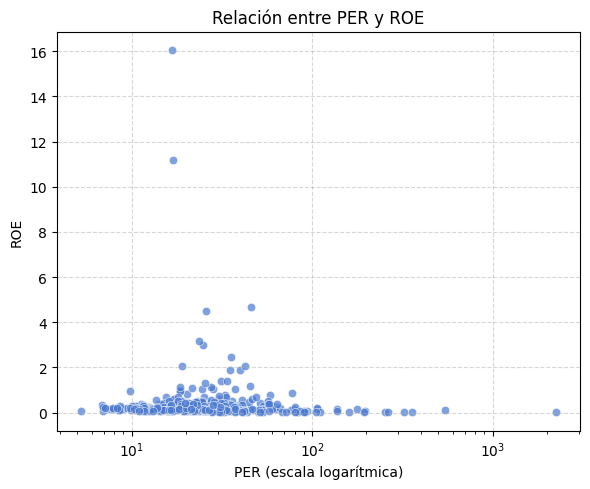

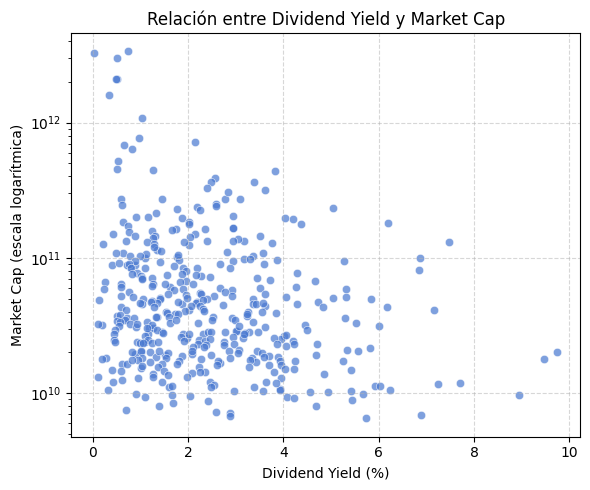

In [9]:
# Scatterplot: PER vs ROE
plt.figure(figsize=(6, 5))
sns.scatterplot(data=fundamentales_df, x="per", y="roe", alpha=0.7)
plt.xscale("log")
plt.title("Relación entre PER y ROE")
plt.xlabel("PER (escala logarítmica)")
plt.ylabel("ROE")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Scatterplot: Dividend Yield vs Market Cap
plt.figure(figsize=(6, 5))
sns.scatterplot(data=fundamentales_df, x="dividend_yield", y="market_cap", alpha=0.7)
plt.yscale("log")
plt.title("Relación entre Dividend Yield y Market Cap")
plt.xlabel("Dividend Yield (%)")
plt.ylabel("Market Cap (escala logarítmica)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


## 🔁 Relación entre Indicadores Fundamentales

A continuación, se presentan dos gráficos de dispersión que analizan relaciones clave entre indicadores financieros comunes: **PER vs ROE** y **Dividend Yield vs Market Cap**. Ambos utilizan escalas logarítmicas para facilitar la visualización de amplios rangos de valores.

---

### 📊 Relación entre PER y ROE

- **Observación general**: La mayoría de los puntos se agrupan en la parte inferior izquierda del gráfico, con valores de PER menores a 100 y ROE entre 0 y 2.
- **Escala logarítmica**: Usada para PER, evidencia que la gran mayoría de empresas tienen PER bajos; los valores extremadamente altos son casos atípicos.
- **Outliers**: Se observan algunos casos con ROE elevados (>10) y PER intermedios, posiblemente empresas altamente rentables con valoraciones aún razonables.
- **Correlación baja**: El gráfico refuerza la correlación cercana a cero observada en la matriz de correlación anterior, lo que indica que **PER y ROE no presentan una relación lineal clara** en este conjunto de datos.

---

### 📉 Relación entre Dividend Yield y Market Cap

- **Distribución dispersa**: Las empresas con alta capitalización de mercado (≥10¹² USD) tienden a tener **rendimientos por dividendo más bajos** (1–2%), mientras que las de menor capitalización presentan mayor variabilidad.
- **Tendencia negativa suave**: Confirma la **correlación negativa leve (-0.20)** observada en la matriz de correlación: empresas más grandes suelen repartir menos dividendos en relación a su precio.
- **Casos extremos**: Hay empresas con dividend yields >6% y market cap inferiores a 10¹⁰, lo que puede indicar compañías en sectores maduros o con baja reinversión de utilidades.

---

### 🎯 Conclusión

- El análisis visual reafirma que **no todas las métricas fundamentales están correlacionadas de forma directa**, lo cual es útil para construir modelos de evaluación más completos y menos redundantes.
- **PER y ROE** muestran independencia, lo que sugiere que pueden usarse conjuntamente para identificar valoraciones anómalas o rentabilidades inusuales.
- **Market Cap y Dividend Yield** tienen una relación inversa leve, lo que sugiere una estrategia de dividendos más conservadora en compañías grandes.

Estas visualizaciones ayudan a **identificar patrones, outliers y validar relaciones** numéricas mediante análisis visual complementario.


## 📊 02.03 Distribución de Indicadores Fundamentales por Sector

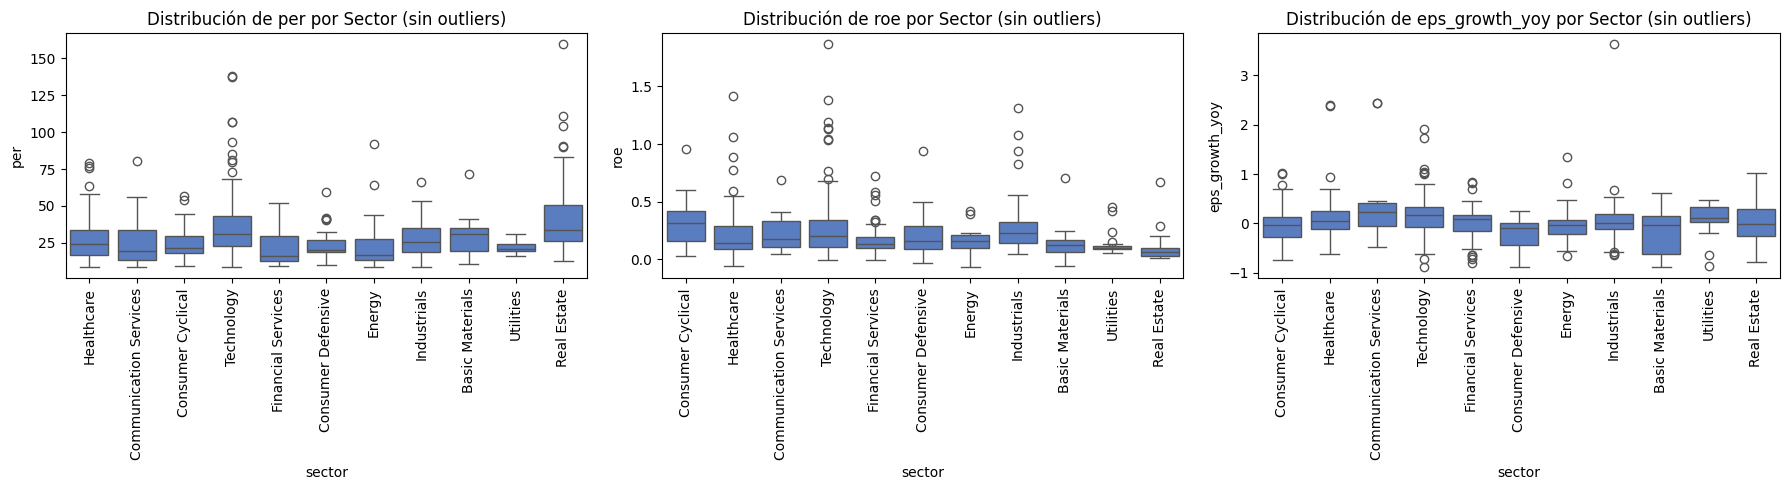

In [10]:
fundamentales_sector = get_fundamentales_sector_df()

# Función para limitar outliers por columna
def limitar_outliers(fundamentales_sector, columna, condicion=True):
    q_low = fundamentales_sector[columna].quantile(0.02)
    q_high = fundamentales_sector[columna].quantile(0.98)
    if condicion == True:
        return fundamentales_sector[(fundamentales_sector[columna] >= q_low) & (fundamentales_sector[columna] <= q_high)]
    else:
        return fundamentales_sector[(fundamentales_sector[columna] <= q_low) | (fundamentales_sector[columna] >= q_high)]
    
# Aplicar filtro y graficar
variables = ["per", "roe", "eps_growth_yoy"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# analizamos sin los outliers
for i, var in enumerate(variables):
    df_filtrado = limitar_outliers(fundamentales_sector, var, True)
    sns.boxplot(
        data=df_filtrado,
        x="sector",
        y=var,
        ax=axes[i]
    )
    axes[i].set_title(f"Distribución de {var} por Sector (sin outliers)")
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


## 📊 Análisis Sectorial de Indicadores Fundamentales (sin outliers)

Este análisis compara la distribución de tres métricas clave —**PER**, **ROE** y **EPS Growth YoY**— por sector económico, eliminando los valores atípicos extremos para obtener una visión más clara y realista del comportamiento sectorial.

---

### 📈 1. PER por Sector

- **Technology** y **Real Estate** muestran una dispersión notable en los valores de PER, con colas hacia valores muy altos.
- **Healthcare**, **Consumer Cyclical** y **Financial Services** también presentan cierta amplitud, indicando valoraciones variadas dentro del sector.
- **Utilities**, **Energy** y **Basic Materials** mantienen distribuciones más contenidas y centradas, típicas de sectores más estables o conservadores.
- 🔍 **Insight**: Sectores de crecimiento como Tecnología tienden a tener valoraciones elevadas, mientras que sectores defensivos presentan PER más contenidos.

---

### 📉 2. ROE por Sector

- **Technology**, **Industrials** y **Energy** lideran con distribuciones de ROE más amplias, alcanzando valores significativamente altos en algunos casos.
- **Healthcare** y **Financial Services** también exhiben empresas con buen retorno sobre el capital.
- **Real Estate** y **Utilities** muestran niveles más bajos y agrupados, consistentes con modelos de negocio de márgenes ajustados o regulados.
- 🔍 **Insight**: ROE es especialmente alto en sectores con innovación o eficiencia operativa, como Tecnología e Industriales.

---

### 📈 3. EPS Growth YoY por Sector

- El sector **Technology** destaca por su gran dispersión en el crecimiento de ganancias, incluyendo varios outliers positivos.
- **Healthcare**, **Industrials** y **Consumer Cyclical** también exhiben crecimiento relevante, aunque con menor volatilidad.
- **Financial Services** y **Basic Materials** tienen casos con crecimiento negativo, posiblemente reflejando ajustes recientes o impacto macroeconómico.
- 🔍 **Insight**: El crecimiento de EPS varía mucho por sector; la tecnología y la salud lideran, mientras que los sectores más tradicionales son más estables o decrecientes.

---

### 🎯 Conclusión

- Existen **diferencias marcadas en el perfil financiero según sector**, tanto en valuación como en rentabilidad y crecimiento.
- Sectores como **Technology** y **Healthcare** combinan alto ROE con alto crecimiento, ideales para estrategias de crecimiento.
- **Utilities**, **Real Estate** y **Basic Materials** ofrecen estabilidad, siendo atractivos para inversores más conservadores.
- La limpieza de outliers mejora la visibilidad de patrones centrales y facilita comparaciones homogéneas para análisis sectorial y selección de portafolio.

Este enfoque permite fundamentar decisiones de inversión sectoriales con base en indicadores sólidos y bien distribuidos.



### Analizamos los outliers

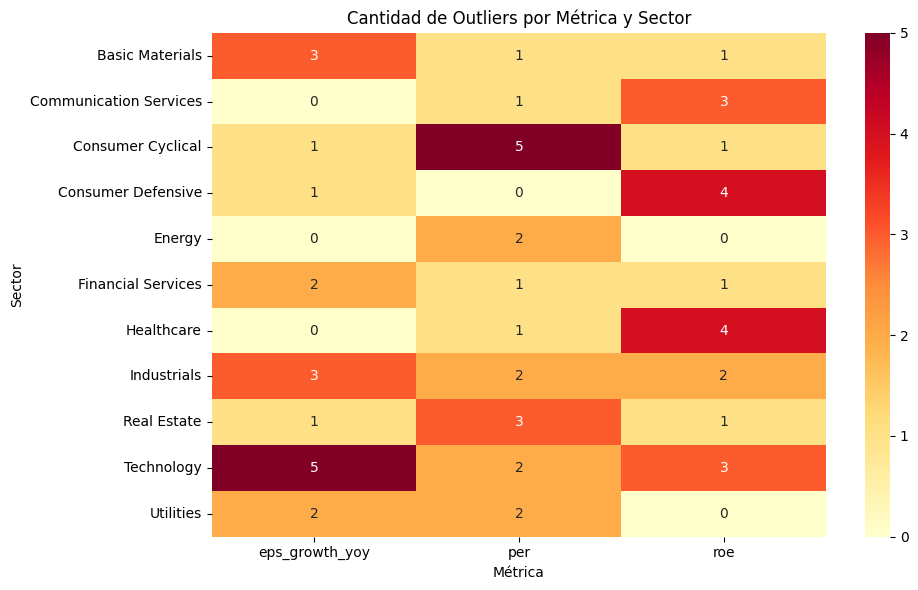

In [11]:
# 1. Detectar outliers por métrica y marcarlo
variables = ["per", "roe", "eps_growth_yoy"]
outlier_flags = []

for var in variables:
    q_low = fundamentales_sector[var].quantile(0.02)
    q_high = fundamentales_sector[var].quantile(0.98)

    df_out = fundamentales_sector[
        (fundamentales_sector[var] < q_low) | (fundamentales_sector[var] > q_high)
    ][["ticker", "sector"]].copy()

    df_out["métrica"] = var
    outlier_flags.append(df_out)

# 2. Unir todos los outliers detectados
outliers_df = pd.concat(outlier_flags, ignore_index=True)

# 3. Agrupar: cantidad de outliers por sector y métrica
conteo_sector_metrica = outliers_df.groupby(["métrica", "sector"]).size().reset_index(name="cantidad")

# 4. Gráfico de calor sector vs métrica
pivot = conteo_sector_metrica.pivot(index="sector", columns="métrica", values="cantidad").fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap="YlOrRd", fmt=".0f")
plt.title("Cantidad de Outliers por Métrica y Sector")
plt.xlabel("Métrica")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

## 🔍 Mapa de Calor: Outliers por Métrica y Sector

El siguiente heatmap muestra la cantidad de empresas **outliers** detectadas por **sector** y por cada métrica financiera clave:

- `eps_growth_yoy`: crecimiento interanual de ganancias por acción.
- `per`: Price to Earnings Ratio.
- `roe`: retorno sobre el capital (rentabilidad).

Los outliers se identificaron excluyendo los valores fuera del rango percentil 2%-98% para cada métrica individualmente.

---

### 📊 Observaciones Clave

#### 📈 `eps_growth_yoy` (Crecimiento de EPS)
- **Technology** lidera con **5 outliers**, lo que destaca su perfil de crecimiento agresivo y volátil.
- **Industrials** y **Basic Materials** también muestran 3 outliers cada uno, reflejando variabilidad significativa.
- **Energy**, **Communication Services** y **Healthcare** no presentan outliers, lo cual sugiere comportamientos más estables en cuanto a crecimiento reciente.

#### 💰 `per` (Valoración)
- **Consumer Cyclical** destaca con **5 outliers** en PER, lo que indica una fuerte dispersión en las valoraciones dentro del sector.
- **Real Estate** (3 outliers) y **Industrials**, **Energy**, y **Utilities** (2 cada uno) también presentan valores extremos, lo que puede reflejar divergencias de mercado o estructuras financieras particulares.

#### 🏦 `roe` (Rentabilidad)
- **Consumer Defensive** y **Healthcare** lideran con **4 outliers** cada uno, indicando una amplia variabilidad en retorno sobre el capital.
- **Technology** y **Communication Services** también tienen 3 outliers cada uno, lo que sugiere que la rentabilidad es altamente heterogénea dentro de esos sectores.
- **Energy** y **Utilities** no tienen outliers en ROE, lo que puede reflejar un comportamiento más predecible o regulado.

---

### 🎯 Conclusión

- **Technology** es el único sector con un número alto de outliers en las tres métricas, lo que refuerza su perfil de **alta dispersión y volatilidad fundamental**.
- **Consumer Cyclical** y **Healthcare** también destacan por sus valores extremos, aunque concentrados en métricas específicas.
- En contraste, sectores como **Energy**, **Financial Services** y **Utilities** exhiben **distribuciones más homogéneas**, ideales para estrategias de bajo riesgo o carteras defensivas.

Este tipo de análisis es útil para identificar sectores donde la **heterogeneidad fundamental** puede representar tanto **oportunidades de selección activa** como **riesgos de dispersión extrema**.


## 📊 02.04 Promedio de Retorno Anual por Sector

C:\Users\Agus\AppData\Local\Temp\ipykernel_17512\796823762.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


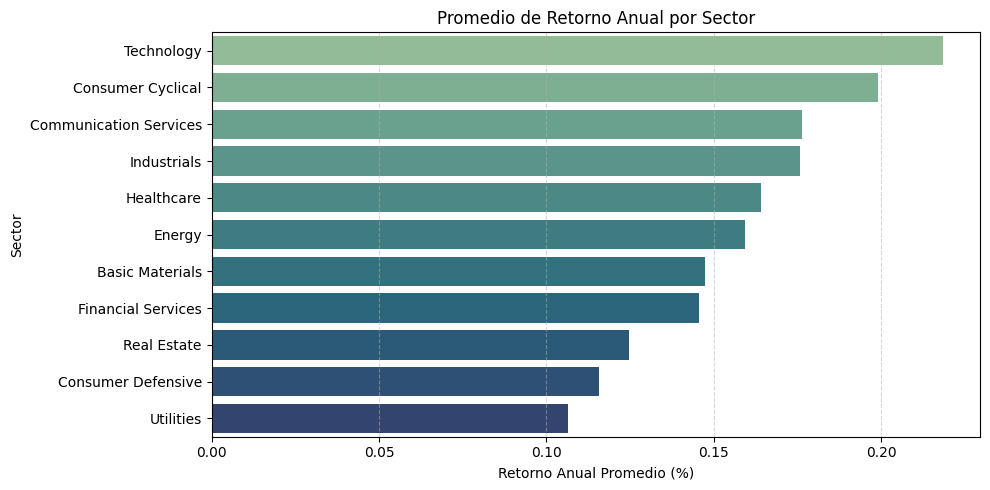

In [12]:
# Ejecutar la función
promedios_sector = get_promedios_var_annual_por_sector()
promedios_sector

# Graficar correctamente
plt.figure(figsize=(10, 5))
sns.barplot(
    data=promedios_sector,
    x="promedio_var_annual",
    y="sector",
    palette="crest"
)
plt.title("Promedio de Retorno Anual por Sector")
plt.xlabel("Retorno Anual Promedio (%)")
plt.ylabel("Sector")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



## 📊 Promedio de Retorno Anual por Sector

Este gráfico presenta el **retorno anual promedio** por sector desde el año **2008**, calculado como la variación porcentual anual del precio de las acciones, promediada por sector. Sirve como una referencia clave para evaluar el rendimiento histórico relativo entre distintas industrias.

---

### 🔝 Sectores con Mejor Desempeño

- **Technology** se ubica en la cima con un retorno promedio **mayor al 21% anual**, reflejando su papel protagónico en la economía digital, la automatización y el crecimiento exponencial en capitalización de mercado.
- **Consumer Cyclical** le sigue de cerca (~20%), lo que evidencia un excelente comportamiento post-crisis en consumo discrecional, e-commerce y marcas globales.
- **Communication Services** e **Industrials** también presentan retornos sólidos (cercanos al 17%), apoyados por la transformación digital y el impulso a la infraestructura.

---

### 🔻 Sectores con Menor Desempeño

- **Utilities** es el sector con menor retorno (~10%), típico de sectores defensivos con menor volatilidad y crecimiento acotado.
- **Consumer Defensive**, **Real Estate** y **Financial Services** también se ubican en la parte baja del ranking, influenciados por su perfil conservador o sensibilidad a tasas de interés y ciclos económicos.

---

### 📌 Observaciones Intermedias

- **Healthcare** y **Energy** tienen retornos moderados, en torno al 16%. Mientras que salud se ha beneficiado de megatendencias como el envejecimiento poblacional, energía ha estado sujeta a mayor volatilidad por el precio del petróleo y transición energética.
- **Basic Materials** también se mantiene en una zona intermedia, dependiente de la demanda global y políticas de infraestructura.

---

### 🎯 Conclusión

- Sectores como **Technology** y **Consumer Cyclical** son históricamente los más rentables, ideales para estrategias de crecimiento.
- **Utilities** y sectores defensivos pueden ser útiles en contextos de baja volatilidad o para perfiles conservadores.
- Este análisis aporta una base sólida para decisiones de **asignación sectorial estratégica**, especialmente en carteras orientadas a largo plazo.





## 📉02.05 Relación entre RSI y Volatilidad (20 días)

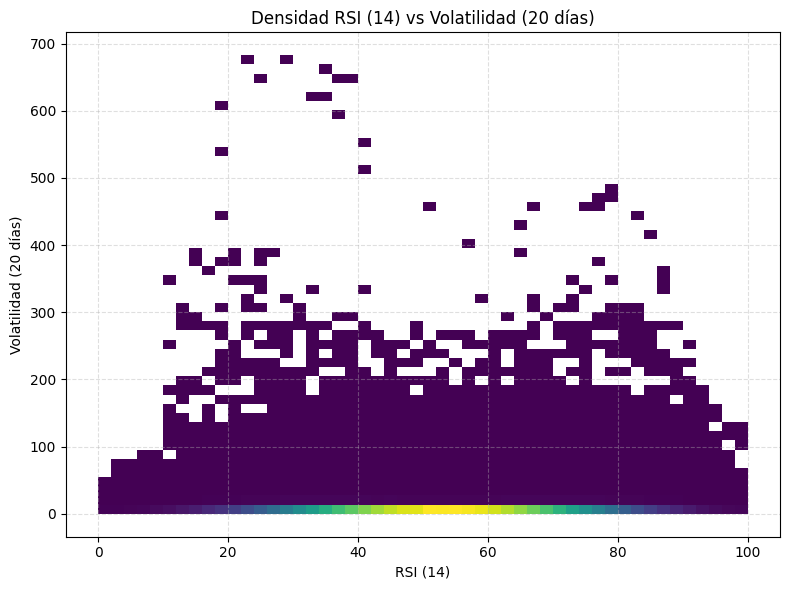

In [13]:
# Cargar datos
tecnicos_filtrado = get_indicadores_tecnicos_filtrados()

# Crear heatmap de densidad
plt.figure(figsize=(8, 6))
sns.histplot(
    data=tecnicos_filtrado,
    x="rsi_14",
    y="volatility_20",
    bins=50,
    pmax=0.95,
    cmap="viridis"
)
plt.title("Densidad RSI (14) vs Volatilidad (20 días)")
plt.xlabel("RSI (14)")
plt.ylabel("Volatilidad (20 días)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


## 📊 Densidad de RSI (14) vs Volatilidad (20 días)

El gráfico muestra un **heatmap de densidad** que permite visualizar la relación entre el **Índice de Fuerza Relativa (RSI)** y la **volatilidad de 20 días** para una gran cantidad de empresas. Esta visualización sustituye el clásico gráfico de dispersión cuando el volumen de datos es muy alto.

---

### 🔍 Observaciones Clave

- La mayoría de las observaciones se concentran en la franja de **RSI entre 40 y 70**, lo cual refleja una zona neutral o moderadamente sobrecomprada.
- **La volatilidad más común** se encuentra en valores bajos (aproximadamente entre **0 y 20**), como indica la mayor intensidad de color en esa región.
- No se detectan patrones evidentes de que RSI influya directamente sobre la volatilidad. Las zonas de **RSI muy bajos (0–20)** y **muy altos (80–100)** no muestran una volatilidad especialmente elevada.
- Algunos **valores extremos de volatilidad** (>500) aparecen con menor frecuencia, sin una correlación clara con el RSI.

---

### 📌 Conclusión

Aunque existe una amplia dispersión de valores, la densidad sugiere que:

- **La volatilidad tiende a ser baja** en la mayoría de los casos, sin importar el nivel de RSI.
- No hay una **relación directa** o simple entre RSI y volatilidad.
- Este análisis es útil para descartar la hipótesis de que niveles extremos de RSI se asocian necesariamente con mayor volatilidad.

Este enfoque permite visualizar grandes volúmenes de datos de forma más clara y robusta frente al ruido.


## 📊 02.06 Análisis de Volatilidad Anual Promedio por Sector

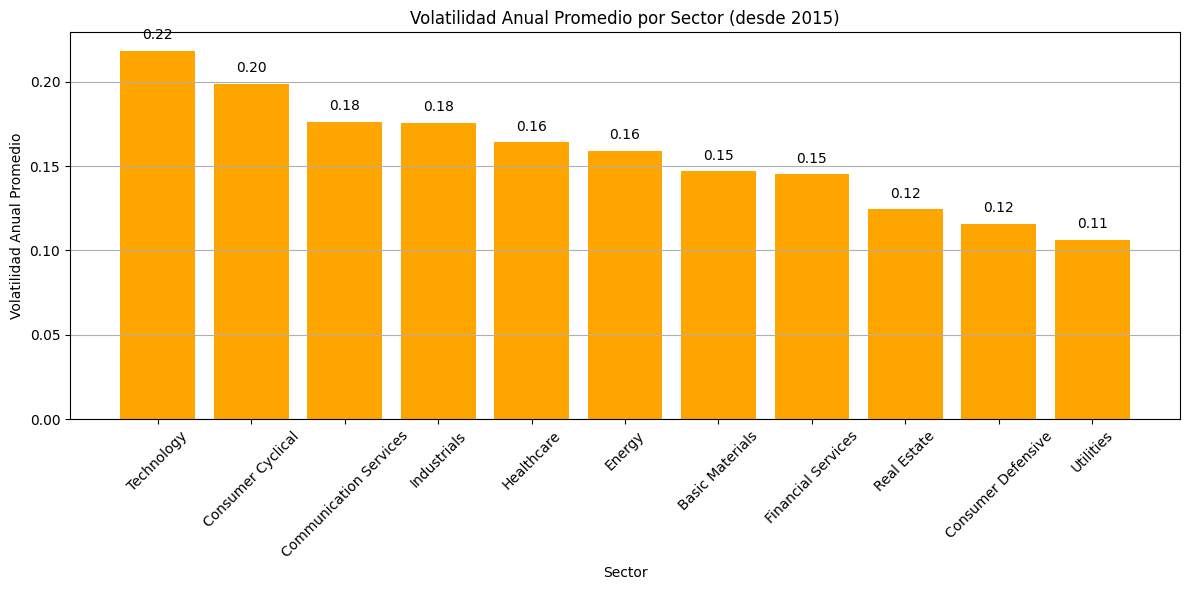

In [14]:
# Ejecutar función
volatilidad_sector = get_volatilidad_por_sector()
volatilidad_sector

# Crear gráfico de barras con etiquetas
plt.figure(figsize=(12, 6))
bars = plt.bar(volatilidad_sector['sector'], volatilidad_sector['promedio_var_annual'], color='orange')

# Etiquetas sobre cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.2f}', ha='center', va='bottom')

plt.title('Volatilidad Anual Promedio por Sector (desde 2015)')
plt.xlabel('Sector')
plt.ylabel('Volatilidad Anual Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


## 📊 Volatilidad Anual Promedio por Sector (desde 2015)

Este gráfico muestra la **volatilidad anual promedio** de los sectores desde 2015, calculada como la desviación estándar de los retornos anuales de las acciones dentro de cada sector. Una mayor volatilidad implica mayor variabilidad en los precios, mientras que una menor indica comportamiento más estable.

---

### 🥇 Sectores Más Volátiles

- **Technology** lidera con una volatilidad de **0.22**, destacándose como el sector más dinámico y riesgoso. Esta cifra refleja su alta exposición a cambios en tasas de interés, disrupción tecnológica y expectativas de crecimiento.
- **Consumer Cyclical** le sigue con **0.20**, lo que es consistente con su naturaleza dependiente del ciclo económico y del comportamiento del consumidor.
- **Communication Services** e **Industrials** presentan una volatilidad de **0.18**, también elevada debido a su exposición a tendencias macroeconómicas y de innovación.

---

### 📉 Sectores Más Estables

- **Utilities** es el sector más estable, con una volatilidad de **0.11**, reflejo de su modelo regulado, ingresos previsibles y bajo crecimiento.
- **Consumer Defensive** y **Real Estate** presentan **0.12**, lo cual es típico de sectores defensivos que ofrecen bienes esenciales o servicios con demanda constante.
- **Financial Services**, **Basic Materials** y **Energy** se sitúan en la franja media (~0.15–0.16), con un equilibrio entre riesgo y estabilidad.

---

### 🧠 Conclusión

- Los sectores con mayor volatilidad pueden ofrecer **mayores oportunidades de retorno**, pero implican **más riesgo** y son más sensibles a eventos macroeconómicos y shocks.
- Sectores como **Utilities**, **Consumer Defensive** y **Real Estate** son ideales para estrategias de **inversión defensiva o de bajo riesgo**.
- Este análisis complementa perfectamente las métricas de retorno, permitiendo evaluar la **relación riesgo-rendimiento sectorial** para una mejor asignación estratégica de activos.


## 🧭 02.06 Análisis de Decisiones de Inversión por Sector

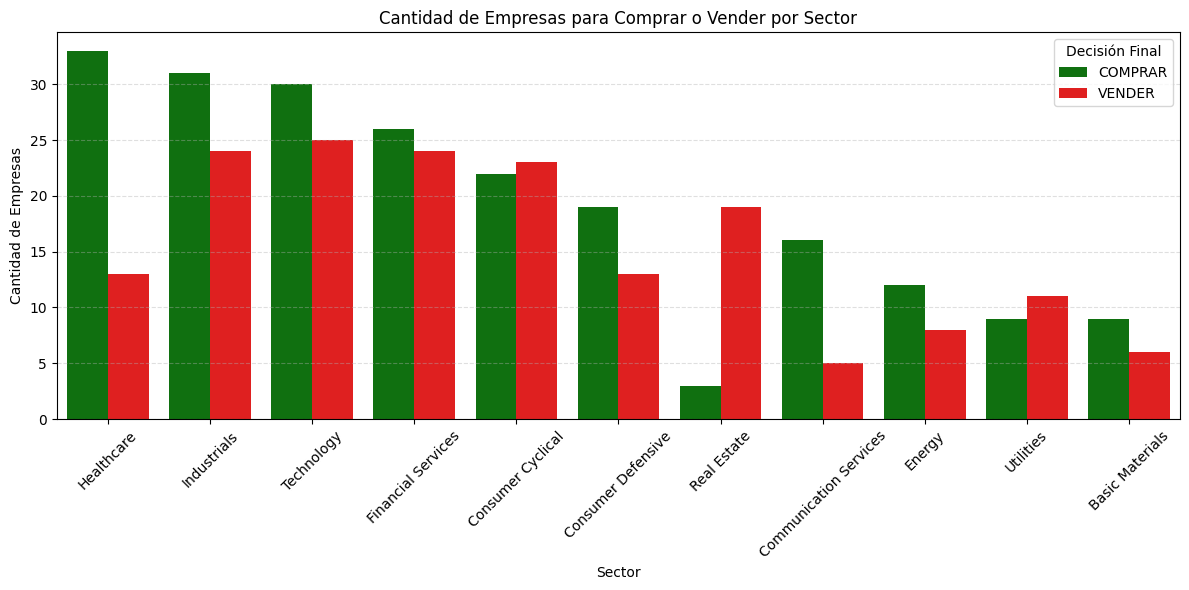

In [15]:
df_sectores_decision_final = get_decisiones_por_sector()
df_sectores_decision_final

# Obtener los datos
df_sectores_decision_final = get_decisiones_por_sector()

# Gráfico de barras apiladas por sector
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_sectores_decision_final,
    x="sector",
    y="cantidad",
    hue="decision_final",
    palette={"COMPRAR": "green", "VENDER": "red"}
)
plt.title("Cantidad de Empresas para Comprar o Vender por Sector")
plt.xlabel("Sector")
plt.ylabel("Cantidad de Empresas")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.legend(title="Decisión Final")
plt.tight_layout()
plt.show()


## 🧭 Análisis de Decisiones de Inversión por Sector

Este gráfico muestra la cantidad de empresas recomendadas para **COMPRAR** o **VENDER**, agrupadas por sector económico. Las decisiones provienen de una evaluación integral basada en señales técnicas y fundamentales (`decision_final`).

---

### 🔍 Observaciones Clave

#### ✅ Sectores con Mayor Número de Recomendaciones de **Compra**
- **Healthcare** encabeza con 33 empresas sugeridas para compra, reflejando su buen posicionamiento en términos de rentabilidad, crecimiento y estabilidad.
- **Industrials** y **Technology** también superan las 30 recomendaciones de compra, señalando un entorno atractivo impulsado por innovación, eficiencia y recuperación económica.
- **Financial Services** y **Communication Services** también muestran un sesgo positivo con más compras que ventas.

#### 🚨 Sectores con Mayor Número de Recomendaciones de **Venta**
- **Real Estate** tiene un fuerte sesgo bajista: solo 3 compras frente a 19 ventas. Esto podría estar relacionado con el impacto de las tasas de interés o presión en valuaciones.
- **Consumer Cyclical** y **Financial Services** presentan balances muy parejos, pero aún con más señales de venta que sectores defensivos.
- **Utilities** y **Basic Materials** muestran mayor cantidad de ventas que compras, reflejando posiblemente un entorno de bajo crecimiento o falta de momentum.

---

### 📊 Conclusión

- **Healthcare, Industrials y Technology** lideran las oportunidades actuales de compra, destacándose como sectores con momentum y fundamentos sólidos.
- Sectores como **Real Estate, Utilities y Basic Materials** enfrentan mayor presión vendedora, lo cual podría señalar riesgo o falta de atractivo en el corto plazo.
- Este análisis sectorial permite visualizar **dónde se concentran las recomendaciones de acción**, facilitando decisiones top-down para ajustes de cartera.

---

> 💡 Ideal para inversores que buscan alinear su estrategia con las señales predominantes del mercado por sector.



# 03 Analisis temporal

## 📊03.01 Volumen Promedio Negociado por Sector (Mensual)

<Figure size 1600x900 with 0 Axes>

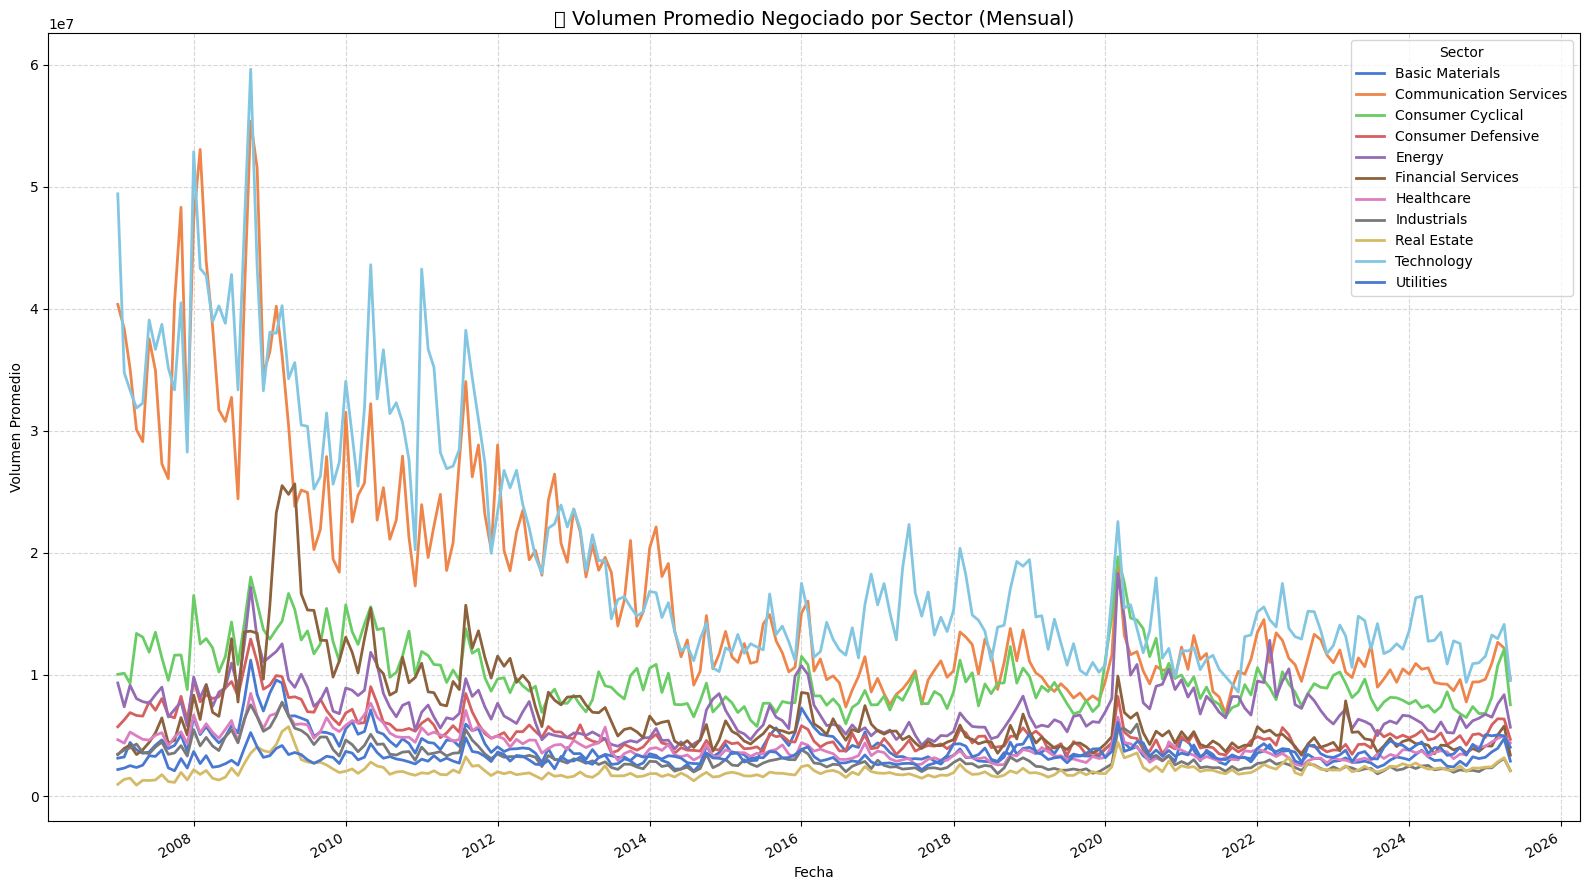

In [16]:
# Ejecutar la función
volumen_sector_mensual_df = get_volumen_mensual_por_sector()
volumen_sector_mensual_df


# Pivot para gráfica
pivot_df = volumen_sector_mensual_df.pivot(index="mes", columns="sector", values="volumen_promedio")

# Gráfico
plt.figure(figsize=(16, 9))
pivot_df.plot(kind='line', linewidth=2, figsize=(16, 9))
plt.title("📊 Volumen Promedio Negociado por Sector (Mensual)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Volumen Promedio")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Sector")
plt.show()

## 📊 Análisis del Volumen Promedio Negociado por Sector (Mensual)

El siguiente gráfico muestra la evolución del **volumen promedio negociado** por sector en forma mensual desde 2007 hasta 2025.

---

### 🔍 Observaciones Clave

1. **📉 Caída progresiva post-crisis 2008**
   - Todos los sectores muestran una reducción constante del volumen tras la crisis financiera global.
   - Esto podría estar vinculado a una menor especulación y ajustes regulatorios posteriores al crash.

2. **📈 Pico en marzo de 2020**
   - Se observa un aumento repentino y sincronizado en todos los sectores durante el inicio de la pandemia del COVID-19.
   - Momento de alta incertidumbre y volatilidad que provocó mayores volúmenes de operación.

3. **💻 Tecnología y Comunicación dominan en volumen**
   - Sectores como **Technology** y **Communication Services** lideran consistentemente en volumen negociado.
   - Reflejan alta liquidez, popularidad entre inversores minoristas y gran capitalización.

4. **🏢 Utilities y Real Estate con volúmenes bajos**
   - Sectores más estables, con menor rotación de acciones.
   - Esto sugiere un comportamiento más conservador o institucional.

5. **📊 Estabilidad desde 2021 en adelante**
   - La mayoría de los sectores muestra estabilización del volumen negociado, con menores picos y mayor regularidad.
   - Puede indicar madurez del mercado o menor sensibilidad a shocks externos.

---

### 🧠 Conclusión

- El volumen negociado es un excelente proxy del **interés del mercado** y la **actividad especulativa**.
- Este análisis permite identificar momentos de **estrés financiero** o **cambio estructural**.
- Próximos pasos recomendados:
  - Agregar eventos históricos clave al gráfico.
  - Analizar volumen de empresas líderes por sector.
  - Combinar con métricas de volatilidad para enriquecer el diagnóstico.


## 📊 03.02 Análisis de la Volatilidad Histórica (`Volatility_20` vs `ATR_14`)

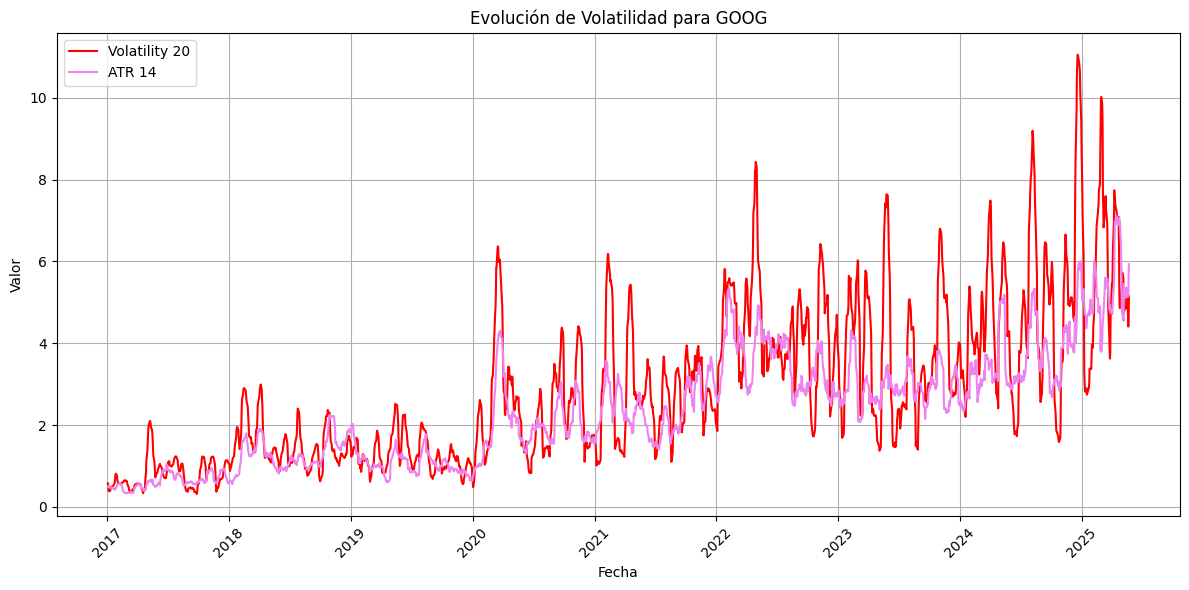

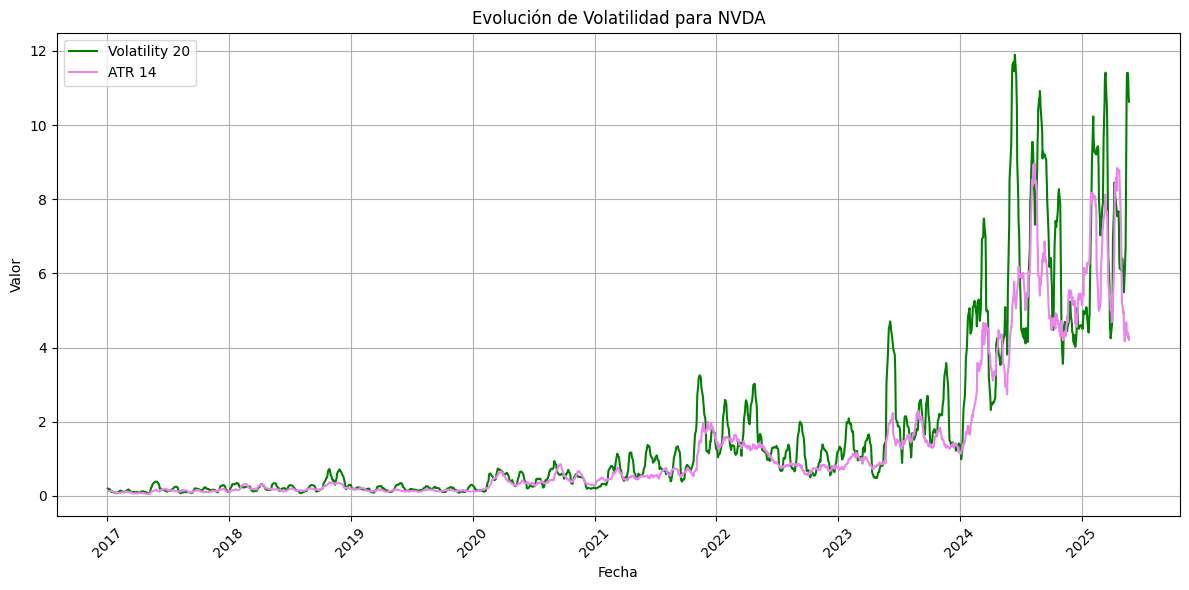

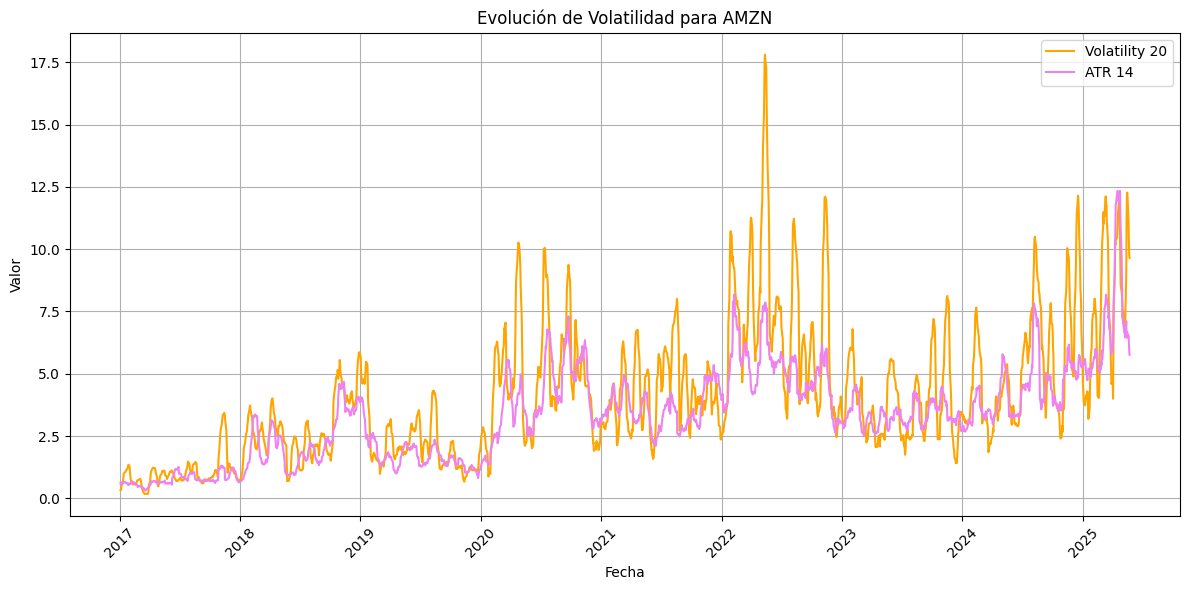

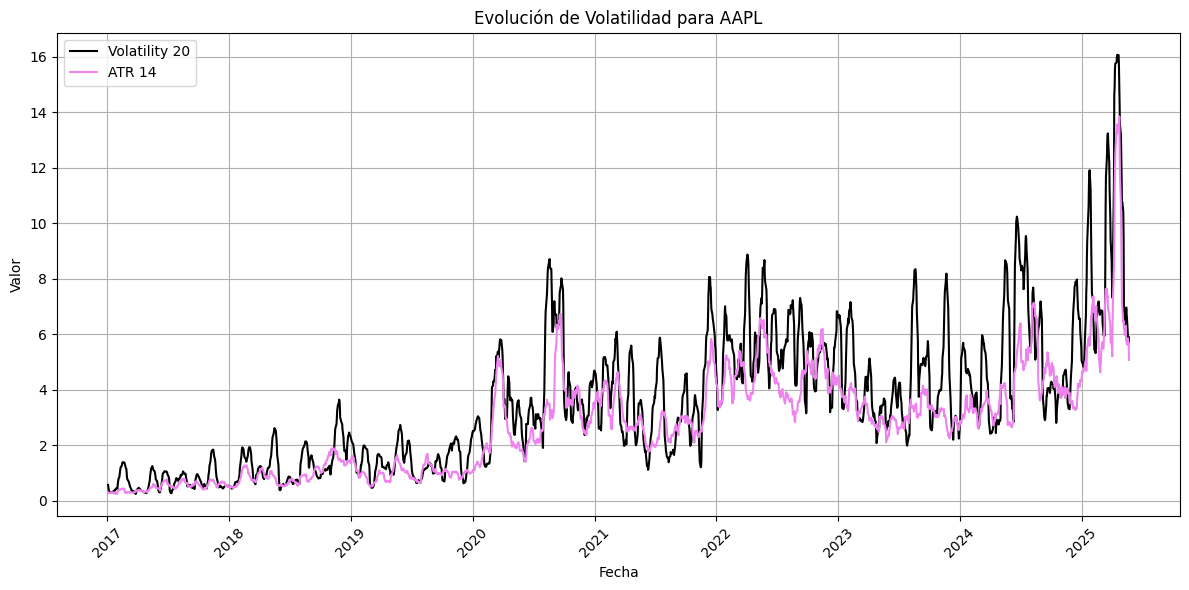

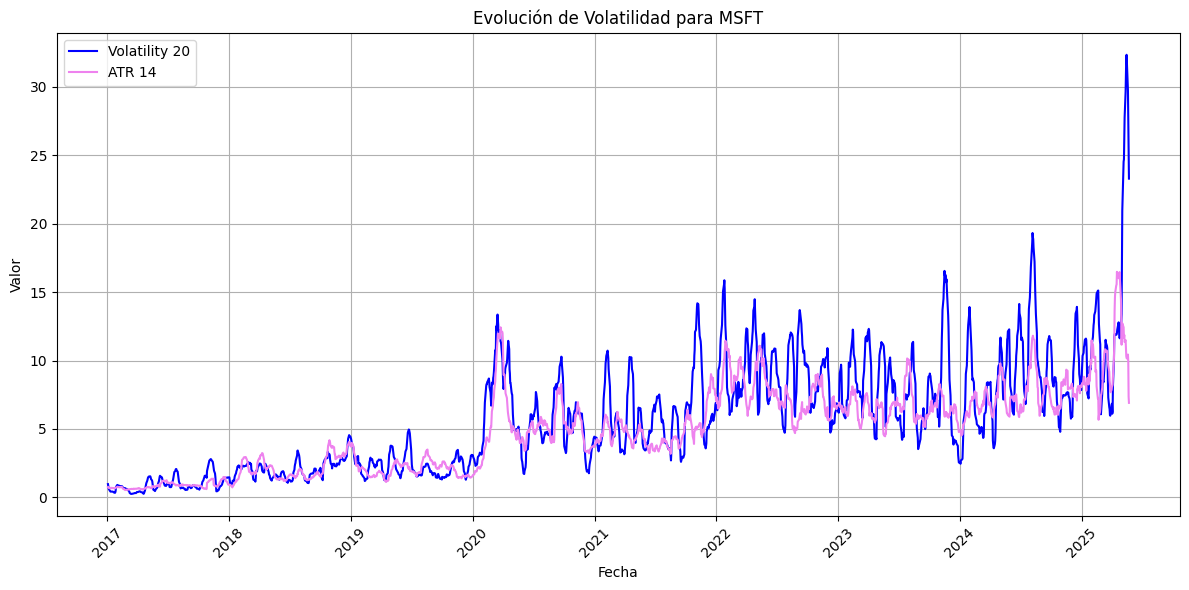

In [17]:
# Ejecutar la función
volatilidad_empresas_claves_df = get_volatilidad_empresas_claves()

# eliminamos missing values
volatilidad_empresas_claves_df = volatilidad_empresas_claves_df.dropna()
volatilidad_empresas_claves_df

# Asegurarse de que la columna 'date' es de tipo datetime
volatilidad_empresas_claves_df['date'] = pd.to_datetime(volatilidad_empresas_claves_df['date'])

color_dict = {
    'MSFT': 'blue',
    'AAPL': 'black',
    'AMZN': 'orange',
    'GOOG': 'red',
    'NVDA': 'green'
}

# Gráfico individual con color por empresa
for ticker in volatilidad_empresas_claves_df['ticker'].unique():
    sub_df = volatilidad_empresas_claves_df[volatilidad_empresas_claves_df['ticker'] == ticker]

    plt.figure(figsize=(12, 6))
    plt.plot(sub_df['date'], sub_df['volatility_20'], label='Volatility 20', color=color_dict[ticker])
    plt.plot(sub_df['date'], sub_df['atr_14'], label='ATR 14', color='violet')
    plt.title(f"Evolución de Volatilidad para {ticker}")
    plt.xlabel("Fecha")
    plt.ylabel("Valor")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



## 📈 Análisis de la Volatilidad Histórica (2017–2025)

Los siguientes gráficos muestran la evolución de la volatilidad para cinco empresas tecnológicas líderes utilizando dos indicadores técnicos:

- **`Volatility_20`**: calcula la desviación estándar de los retornos diarios en una ventana de 20 días. Es un indicador más **reactivo y sensible** a cambios repentinos.
- **`ATR_14` (Average True Range)**: mide el rango verdadero promedio en una ventana de 14 días. Es más **suave y estable**, capturando la magnitud de movimientos sin importar su dirección.

Ambos indicadores permiten evaluar la **incertidumbre del mercado**, pero lo hacen con enfoques distintos. A continuación, se presentan los análisis individuales:

---

### 🟦 Microsoft (MSFT)

- Muestra una tendencia ascendente clara desde 2018, con fuertes picos en 2020 y otro repunte post-2023.
- `Volatility_20` responde más abruptamente a eventos extremos.
- `ATR_14` mantiene una forma similar pero más suavizada, ideal para seguimiento de tendencia.

---

### ⚫Apple (AAPL)

- Volatilidad creciente desde 2020, con mayor intensidad a partir de 2023.
- Ambos indicadores están altamente correlacionados, aunque `Volatility_20` marca más picos.
- El comportamiento refleja un entorno más volátil en años recientes.

---

### 🟧 Amazon (AMZN)

- Volatilidad con varios máximos destacados en 2021 y 2022.
- `Volatility_20` presenta más dispersión, lo que revela movimientos bruscos puntuales.
- `ATR_14` capta mejor la tendencia base sin tanto ruido.

---

### 🟥 Google (GOOG)

- Evolución moderada hasta 2020, seguida por un aumento sostenido hasta 2025.
- `Volatility_20` presenta picos que indican momentos de incertidumbre de corto plazo.
- `ATR_14` permite visualizar una progresión más estructurada de la volatilidad.

---

### 🟩 NVIDIA (NVDA)

- Caso más marcado: casi sin volatilidad antes de 2020, luego crecimiento explosivo.
- Desde 2024 en adelante se observan niveles históricamente altos en ambos indicadores.
- `Volatility_20` destaca los movimientos extremos, mientras que `ATR_14` los amortigua visualmente.

---



## 🔄 03.03 Análisis de la Rotación Sectorial Trimestre a Trimestre (2007–2025)

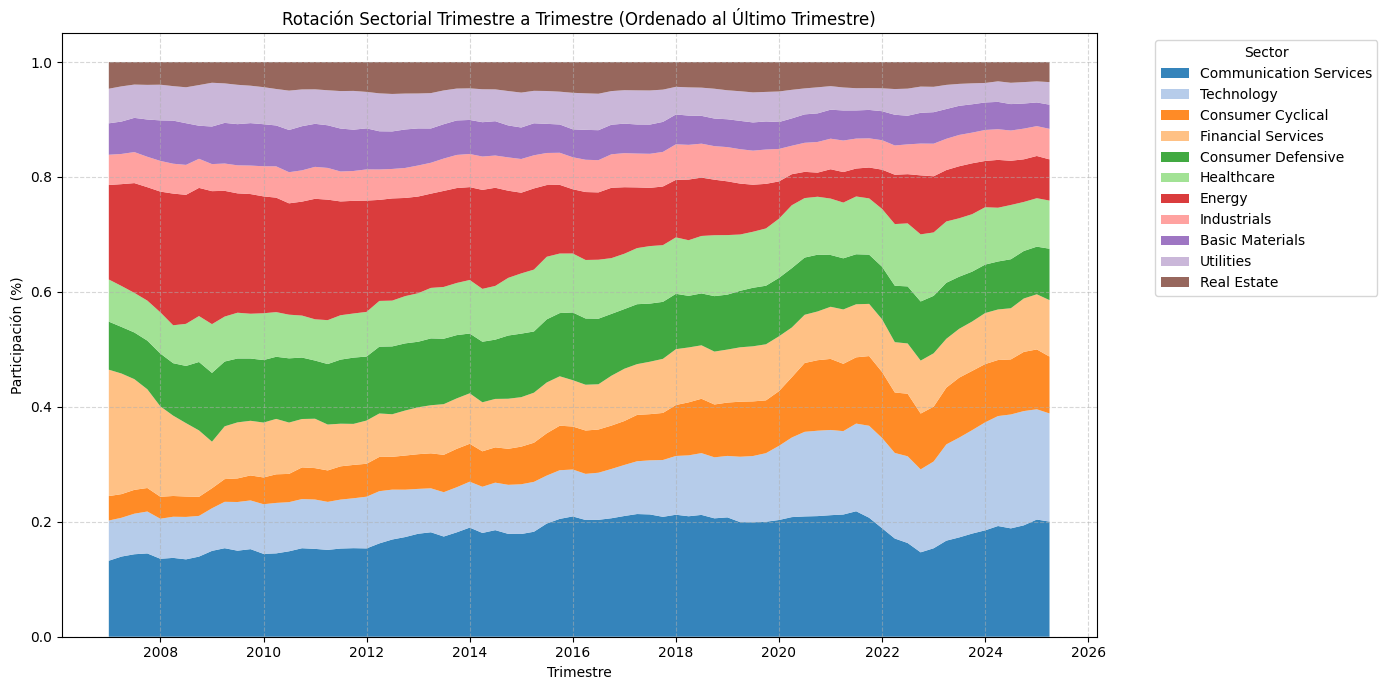

In [18]:
# Ejecutar
rotacion_sectorial_df = get_rotacion_sectorial_trimestral()
rotacion_sectorial_df

# Paso 1: preparar los datos pivotados
rotacion_sectorial_df = rotacion_sectorial_df.sort_values('trimestre')
ultimo_trimestre = rotacion_sectorial_df['trimestre'].max()

# Ordenar sectores por participación en el último trimestre (de mayor a menor)
sector_order = (
    rotacion_sectorial_df[rotacion_sectorial_df['trimestre'] == ultimo_trimestre]
    .sort_values('participacion', ascending=False)['sector']
    .tolist()
)

# Pivotear y reordenar
df_pivot = rotacion_sectorial_df.pivot(index='trimestre', columns='sector', values='participacion')
df_pivot = df_pivot[sector_order]

# Paso 2: graficar manualmente para mantener orden y leyenda
fig, ax = plt.subplots(figsize=(14, 7))

# Colores para que se vean bien y distintos
colors = plt.get_cmap('tab20').colors[:len(sector_order)]

# Graficar área apilada en orden correcto
stack = ax.stackplot(df_pivot.index, df_pivot.T.values, labels=sector_order, colors=colors, alpha=0.9)

# Estética
ax.set_title('Rotación Sectorial Trimestre a Trimestre (Ordenado al Último Trimestre)')
ax.set_ylabel('Participación (%)')
ax.set_xlabel('Trimestre')
ax.grid(True, linestyle='--', alpha=0.5)

# Leyenda en orden correcto
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Sector", labels=sector_order)

plt.tight_layout()
plt.show()

## 🔄 Análisis de la Rotación Sectorial Trimestre a Trimestre (2007–2025)

El gráfico muestra la evolución histórica de la participación relativa por sector en la capitalización bursátil total del mercado, calculada como:

**Market Cap = Acciones en circulación × Precio de cierre**

Los datos están agrupados por trimestres y ordenados según el peso relativo **en el último trimestre** disponible (2025). Este enfoque permite detectar de forma visual la **rotación sectorial** a lo largo del tiempo.

---

### 📊 Principales Observaciones

- **🟦 Communication Services** domina actualmente la participación de mercado. Su crecimiento acelerado desde 2018 coincide con la incorporación de grandes jugadores tecnológicos del sector (Alphabet, Meta). Hoy representa el bloque más amplio de capitalización.

- **🟦 Technology**, aunque históricamente fue dominante (sobre todo entre 2016 y 2021), muestra una leve caída en participación desde 2022, probablemente por toma de ganancias y rotación hacia sectores más cíclicos.

- **🟧 Consumer Cyclical** y **🟧 Financial Services** incrementan sostenidamente su participación desde 2020, en línea con expectativas de crecimiento económico y reactivación del consumo post-pandemia.

- **🟩 Healthcare** mantiene una presencia constante y sólida, actuando como refugio defensivo ante períodos de volatilidad e incertidumbre económica.

- **🟥 Energy**, que había perdido terreno después de 2008, muestra una fuerte **recuperación desde 2021**, probablemente impulsada por la subida en los precios de commodities y la reconfiguración de la matriz energética mundial.

- **🟫 Real Estate**, **🟪 Utilities** y **🟪 Basic Materials** mantienen una participación menor y más estable, típicos de sectores defensivos o de menor crecimiento relativo.

---

### 🧠 Interpretación Estratégica

- Hay una clara **rotación desde sectores defensivos hacia cíclicos y tecnológicos** en períodos de expansión económica, mientras que en momentos de incertidumbre hay migración hacia salud, servicios públicos o bienes esenciales.

- La expansión reciente de sectores como **Energy** y **Financial Services** puede estar vinculada a políticas monetarias, inflación, y recuperación macroeconómica global.

- Este gráfico es una herramienta poderosa para entender los ciclos de inversión institucional y el comportamiento estratégico del mercado frente a distintas etapas del ciclo económico.

---

### 📌 Conclusión

Este análisis dinámico de participación sectorial permite visualizar cómo se ha **redistribuido el capital del mercado** a lo largo de los últimos 18 años. La información aquí presentada es clave para estrategias de inversión basadas en **rotación sectorial**, ya que ofrece una fotografía clara de **cómo y cuándo se mueven los flujos hacia distintos sectores**.

> 🔍 Ideal para inversores que buscan alinear su portafolio con las **fases del ciclo económico** o anticiparse a cambios estructurales en la economía global.



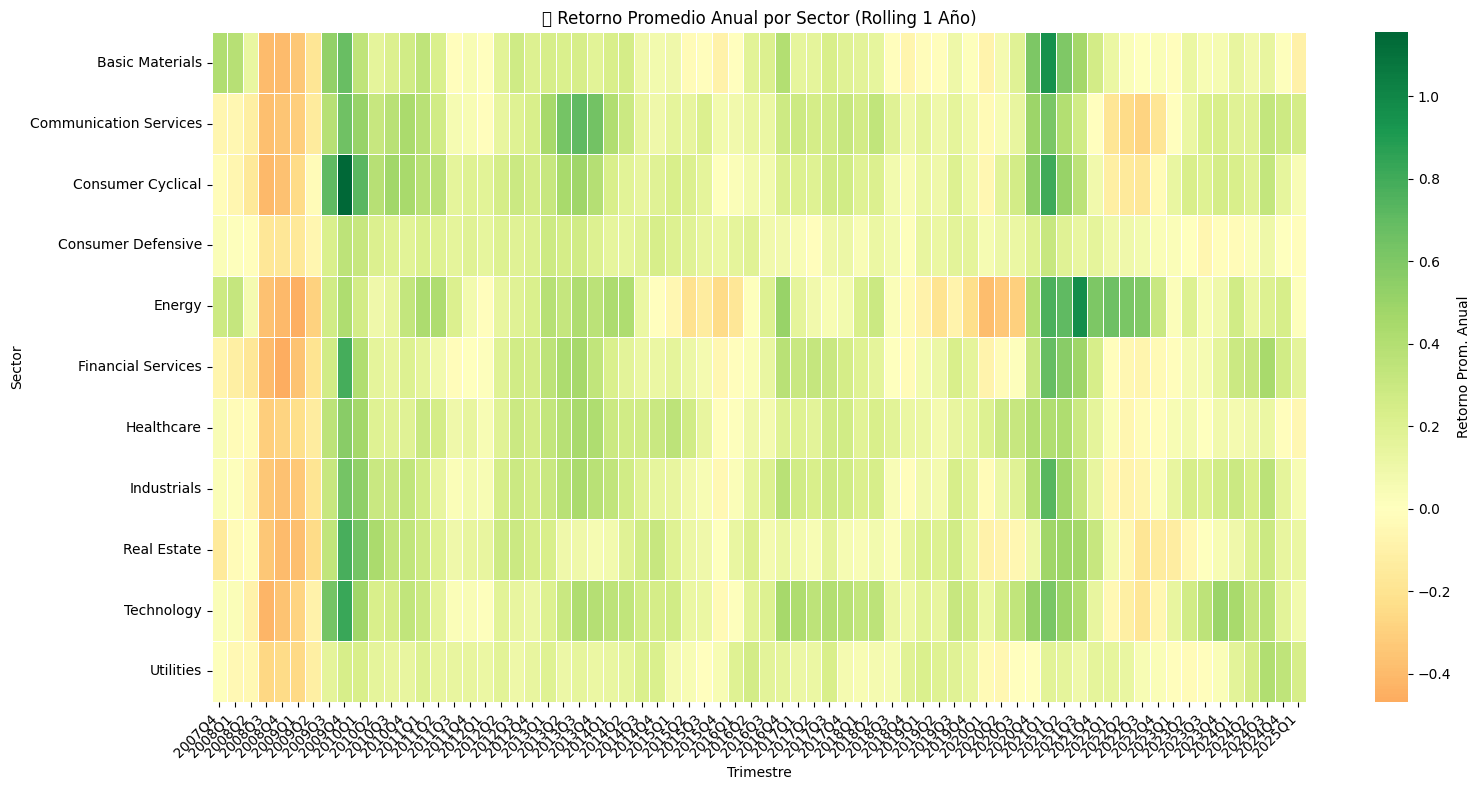

In [19]:
# Ejecutar la función
retornos_sectoriales_df = get_retornos_anuales_por_sector()
retornos_sectoriales_df
# Forzar a datetime, corrigiendo zona horaria si es necesario
retornos_sectoriales_df['trimestre'] = pd.to_datetime(retornos_sectoriales_df['trimestre'], utc=True, errors='coerce')

# Eliminar zona horaria
retornos_sectoriales_df['trimestre'] = retornos_sectoriales_df['trimestre'].dt.tz_localize(None)

# Formatear como "YYYY-Qx"
retornos_sectoriales_df['trimestre_str'] = retornos_sectoriales_df['trimestre'].dt.to_period('Q').astype(str)

# Pivotear para heatmap
heatmap_df = retornos_sectoriales_df.pivot(index='sector', columns='trimestre_str', values='retorno_prom_sector')
heatmap_df = heatmap_df.sort_index(axis=1)

# Graficar heatmap limpio
plt.figure(figsize=(16, 8))
sns.heatmap(
    heatmap_df,
    cmap='RdYlGn',
    center=0,
    annot=False,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Retorno Prom. Anual'}
)

plt.title('📈 Retorno Promedio Anual por Sector (Rolling 1 Año)')
plt.xlabel('Trimestre')
plt.ylabel('Sector')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## 📈 Análisis de Retorno Promedio Anual por Sector (Rolling 1 Año)

El siguiente gráfico tipo heatmap muestra el **retorno promedio anual (móvil)** para cada sector económico, trimestre a trimestre, desde 2007 hasta 2025. El cálculo se basa en una ventana móvil de 252 días (aprox. un año bursátil), y se expresa como:

**Retorno Anual = Precio Actual - Precio Hace 1 Año\Precio Hace 1 Año**

Este análisis permite visualizar qué sectores han liderado o rezagado en distintos momentos del ciclo económico y de mercado.

---

### 🧠 Claves de interpretación:

- **Colores verdes oscuros** indican trimestres de alta rentabilidad sectorial (top performers).
- **Colores naranjas o rojizos** representan retornos negativos o desempeño débil.
- **Colores neutros claros** indican retorno cercano a cero.

---

### 🔍 Observaciones destacadas:

- **2020–2021**: Periodo post-pandemia donde sectores como **Technology**, **Industrials**, y especialmente **Energy** mostraron retornos excepcionalmente altos. El tono verde intenso confirma el rebote económico.
  
- **2008–2009**: Claramente se observa un amplio deterioro en todos los sectores durante la crisis financiera global, con colores anaranjados predominantes en múltiples sectores como **Financial Services** y **Real Estate**.

- **Healthcare** y **Consumer Defensive** mantienen un desempeño más **estable y menos volátil** en casi todos los trimestres, lo que refuerza su rol defensivo en las carteras.

- **Communication Services** y **Technology** tienen una performance **cíclica**, con momentos de liderazgo claros en 2010–2011, 2018, y 2021.

- **Energy** es el sector con mayores oscilaciones: fue uno de los peores en 2014 y 2020, pero **uno de los mejores en 2021–2022**.

---

### 📌 Conclusión

Este heatmap es una herramienta visual poderosa para detectar **tendencias rotativas en el liderazgo sectorial**, evaluar ciclos económicos y guiar decisiones de asset allocation o sector rotation. Los sectores no son estáticos: evolucionan, reaccionan ante el entorno macroeconómico y cambian su atractivo relativo con el tiempo.


## 📊 03.04 Comparativo de Efectividad del RSI como Señal Técnica

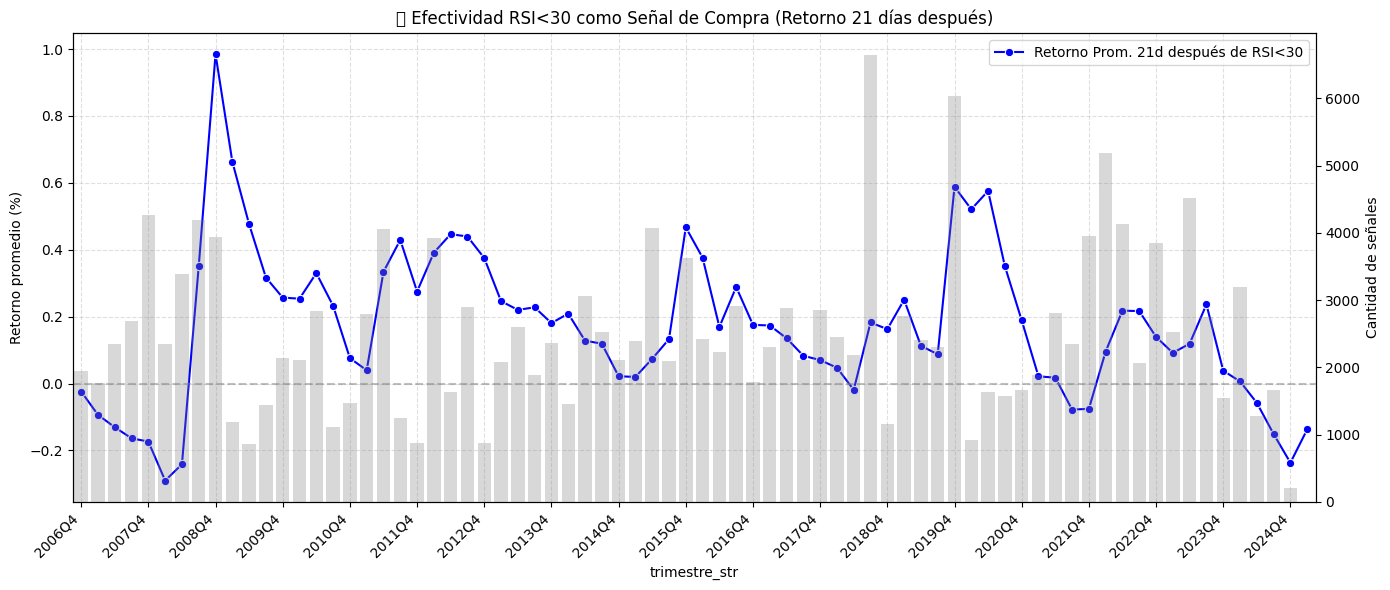

In [20]:
# Ejecutar
efectividad_df = evaluar_efectividad_rsi()
efectividad_df

# Usar trimestre_str para eje X en ambos plots
efectividad_df['trimestre'] = pd.to_datetime(efectividad_df['trimestre'], utc=True).dt.tz_localize(None)
efectividad_df['trimestre_str'] = efectividad_df['trimestre'].dt.to_period('Q').astype(str)

# Crear figura
fig, ax1 = plt.subplots(figsize=(14, 6))

# Línea: retorno promedio post-señal
sns.lineplot(
    data=efectividad_df,
    x='trimestre_str',  # ← usar texto para evitar conflictos
    y='retorno_promedio_post_senal',
    marker='o',
    ax=ax1,
    color='blue',
    label='Retorno Prom. 21d después de RSI<30'
)

ax1.set_ylabel('Retorno promedio (%)')
ax1.axhline(0, linestyle='--', color='gray', alpha=0.5)
ax1.set_title('📈 Efectividad RSI<30 como Señal de Compra (Retorno 21 días después)')
ax1.grid(True, linestyle='--', alpha=0.4)

# Barras: cantidad de señales (2do eje)
ax2 = ax1.twinx()
sns.barplot(
    data=efectividad_df,
    x='trimestre_str',  # ← mismo eje X textual
    y='cantidad_senales',
    alpha=0.3,
    ax=ax2,
    color='gray'
)
ax2.set_ylabel('Cantidad de señales')
# Mostrar solo cada 4 etiquetas
skip = 4
xticks = efectividad_df['trimestre_str']
ax1.set_xticks(range(0, len(xticks), skip))
ax1.set_xticklabels(xticks[::skip], rotation=45, ha='right')

fig.tight_layout()
plt.show()


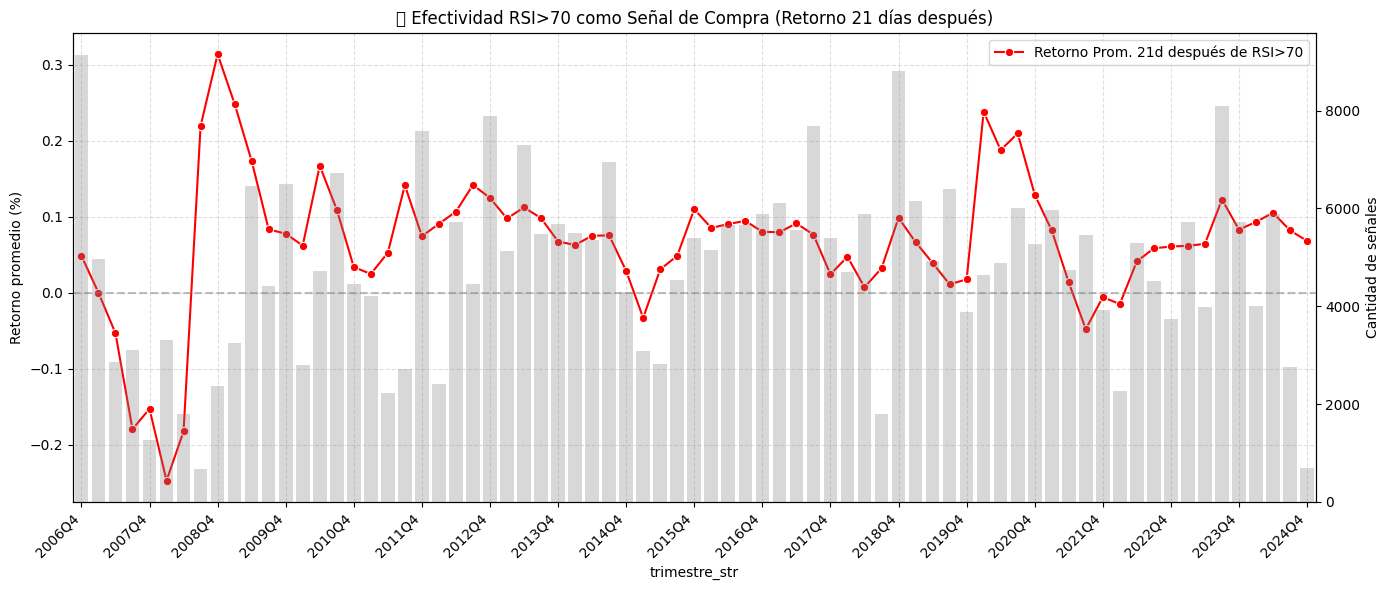

In [21]:
# Ejecutar
efectividad_rsi_alto_df = evaluar_efectividad_rsi_alto()
efectividad_rsi_alto_df

# Usar trimestre_str para eje X en ambos plots
efectividad_rsi_alto_df['trimestre'] = pd.to_datetime(efectividad_rsi_alto_df['trimestre'], utc=True).dt.tz_localize(None)
efectividad_rsi_alto_df['trimestre_str'] = efectividad_rsi_alto_df['trimestre'].dt.to_period('Q').astype(str)

# Crear figura
fig, ax1 = plt.subplots(figsize=(14, 6))

# Línea: retorno promedio post-señal
sns.lineplot(
    data=efectividad_rsi_alto_df,
    x='trimestre_str',  # ← usar texto para evitar conflictos
    y='retorno_promedio_post_senal',
    marker='o',
    ax=ax1,
    color='red',
    label='Retorno Prom. 21d después de RSI>70'
)

ax1.set_ylabel('Retorno promedio (%)')
ax1.axhline(0, linestyle='--', color='gray', alpha=0.5)
ax1.set_title('📈 Efectividad RSI>70 como Señal de Compra (Retorno 21 días después)')
ax1.grid(True, linestyle='--', alpha=0.4)

# Barras: cantidad de señales (2do eje)
ax2 = ax1.twinx()
sns.barplot(
    data=efectividad_rsi_alto_df,
    x='trimestre_str',  # ← mismo eje X textual
    y='cantidad_senales',
    alpha=0.3,
    ax=ax2,
    color='gray'
)
ax2.set_ylabel('Cantidad de señales')
# Mostrar solo cada 4 etiquetas
skip = 4
xticks = efectividad_rsi_alto_df['trimestre_str']
ax1.set_xticks(range(0, len(xticks), skip))
ax1.set_xticklabels(xticks[::skip], rotation=45, ha='right')

fig.tight_layout()
plt.show()


## 📊 Comparativo de Efectividad del RSI como Señal Técnica

### 🔵 RSI < 30 (Señal de Compra por Sobreventa)

- **Interpretación técnica**: Niveles por debajo de 30 indican sobreventa, lo que sugiere una posible reversión alcista.
- **Comportamiento observado**:
  - Entre 2008 y 2012, la señal fue **altamente efectiva**, con retornos promedio posteriores que en varios trimestres superaron el +0.5.
  - En trimestres más recientes (2022–2024), los retornos fueron **más bajos o negativos**, reflejando menor eficacia en contextos de alta volatilidad estructural.
  - La cantidad de señales tiende a aumentar en **momentos de corrección generalizada**, como ocurrió en 2020 y 2022.

---

### 🔴 RSI > 70 (Señal de Venta por Sobrecompra)

- **Interpretación técnica**: RSI superior a 70 indica sobrecompra, tradicionalmente asociado a correcciones o techos temporales.
- **Comportamiento observado**:
  - A diferencia de la teoría, la mayoría de los trimestres posteriores a RSI>70 muestran **retornos positivos**, especialmente en años de fuerte tendencia alcista.
  - Esto sugiere que en contextos de mercado estructuralmente alcistas, un RSI alto **no necesariamente anticipa una caída**, y puede ser parte de una fase de continuación.
  - Se observó una **mayor cantidad de señales**, mostrando que los activos pasan más tiempo en sobrecompra que en sobreventa.

---

### 📌 Conclusiones Comparativas

| Métrica                      | RSI < 30                        | RSI > 70                          |
|-----------------------------|----------------------------------|-----------------------------------|
| Tipo de señal               | Potencial de compra              | Potencial de venta                |
| Retornos observados         | Positivos en fases post-crisis   | Positivos en general              |
| Comportamiento reciente     | Menor eficacia                   | Estabilidad y consistencia        |
| Frecuencia de señales       | Baja (crisis o caídas fuertes)   | Alta (en mercados alcistas)       |

---

### 🧠 Insight Final

> Las reglas tradicionales del RSI requieren **contextualización**.  
> RSI<30 puede ser útil tras correcciones bruscas, mientras que RSI>70 **no debería usarse como señal de venta aislada** en mercados alcistas.  
> **Complementar estas señales con análisis de tendencia o fundamentales puede mejorar su utilidad.**

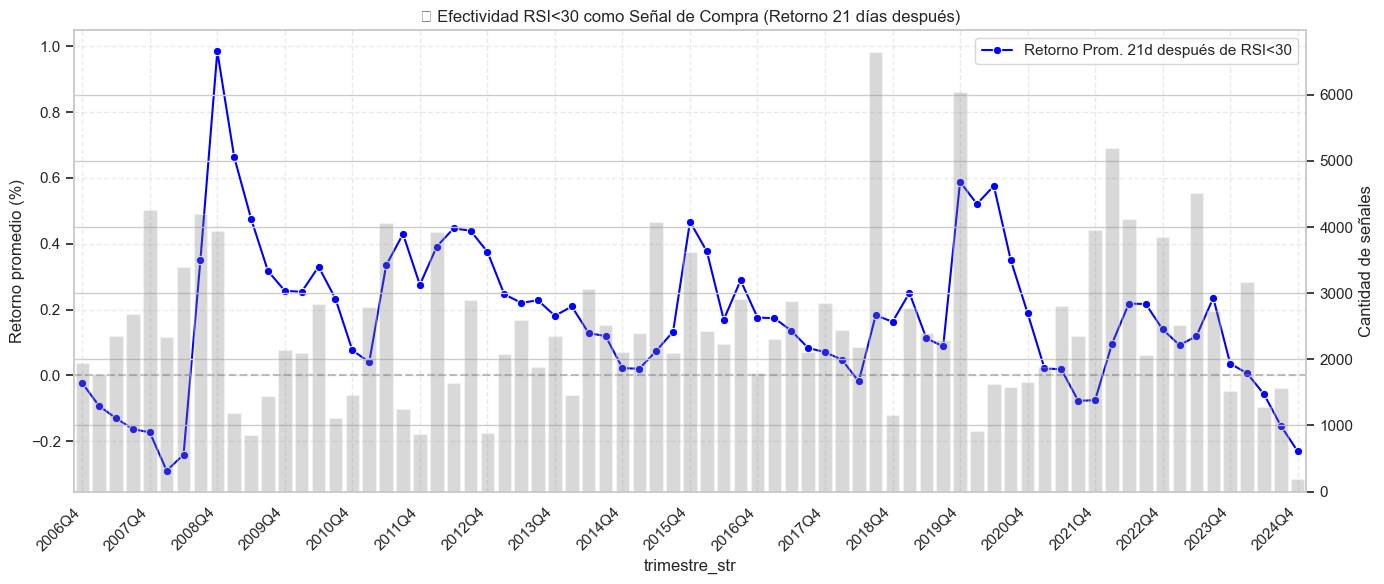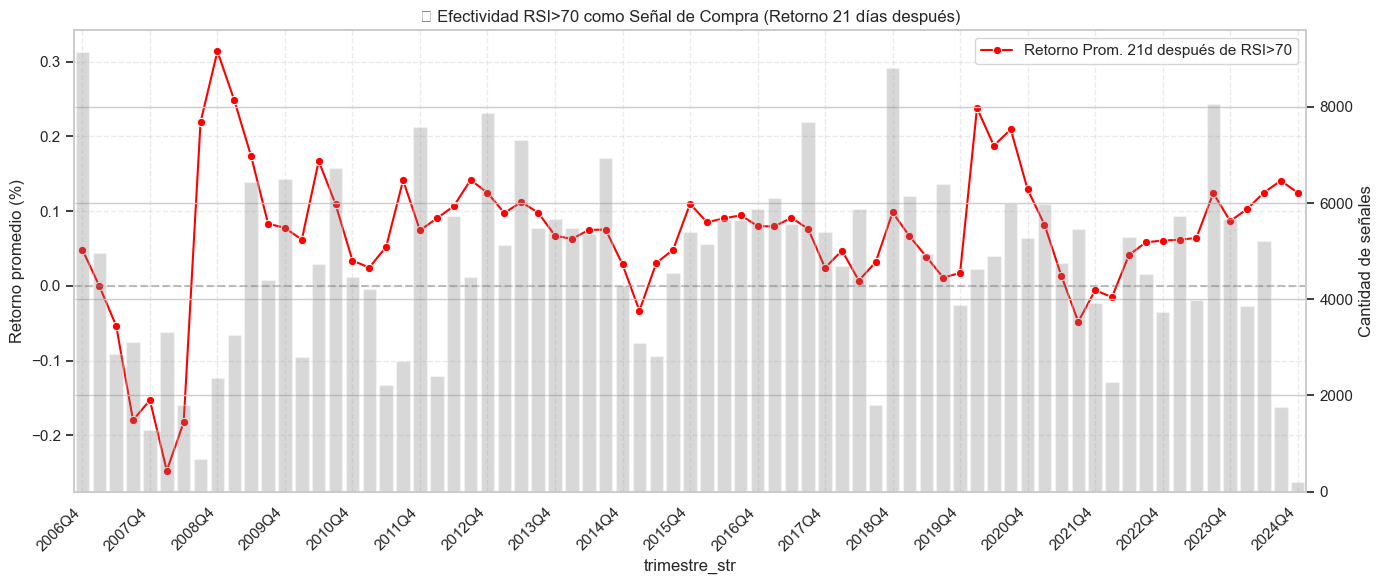

# 📊 03.05 Análisis de Cruces SMA20 vs. SMA50 en 5 Acciones Clave

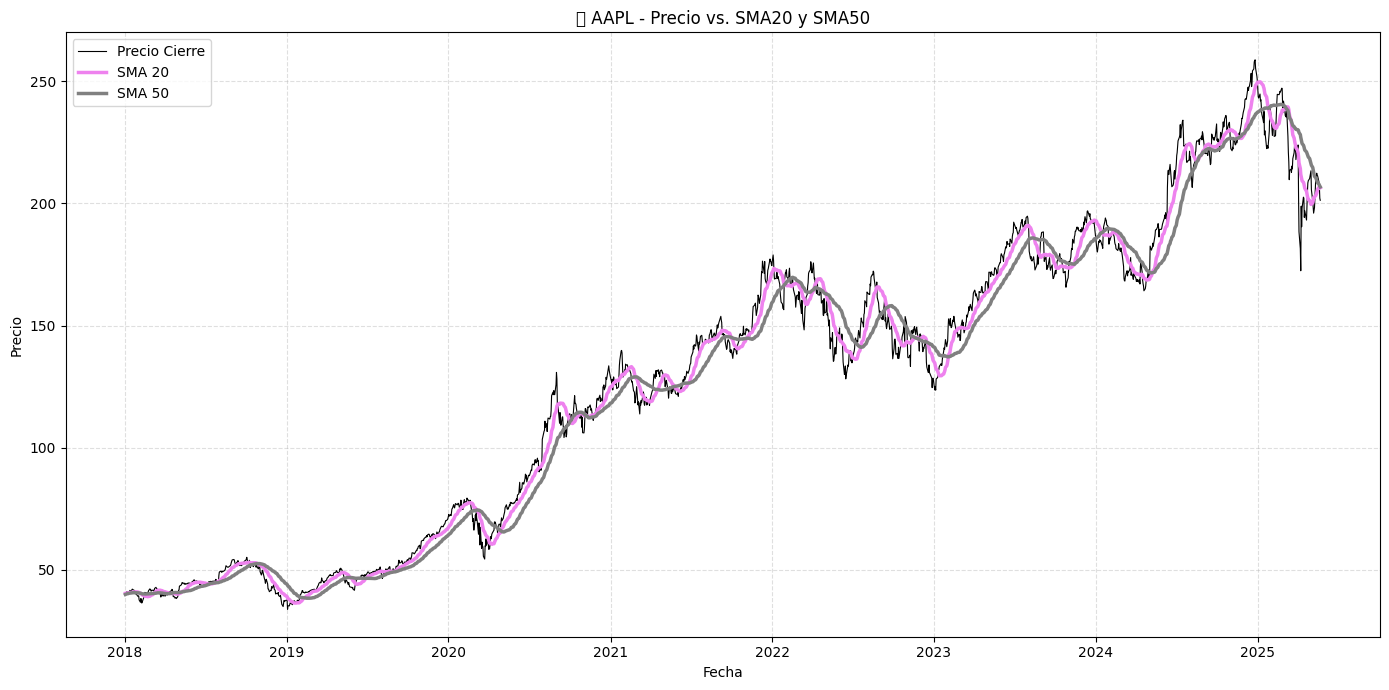

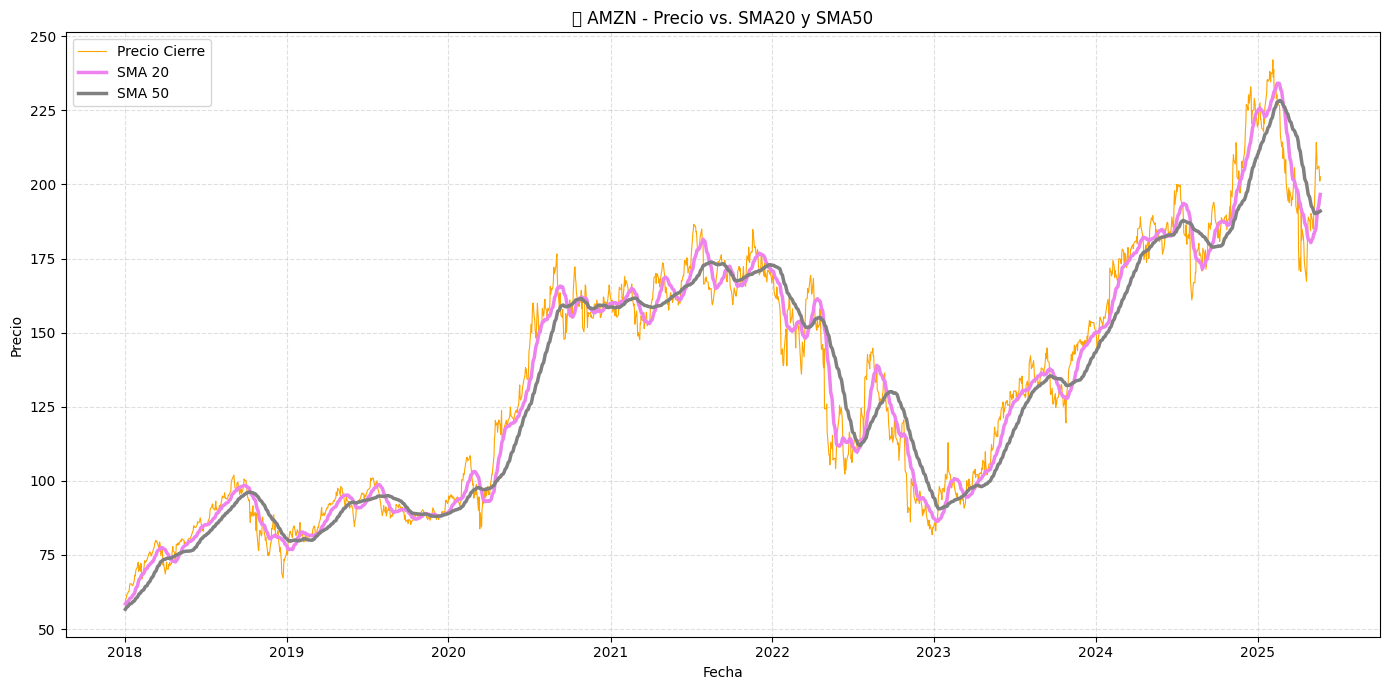

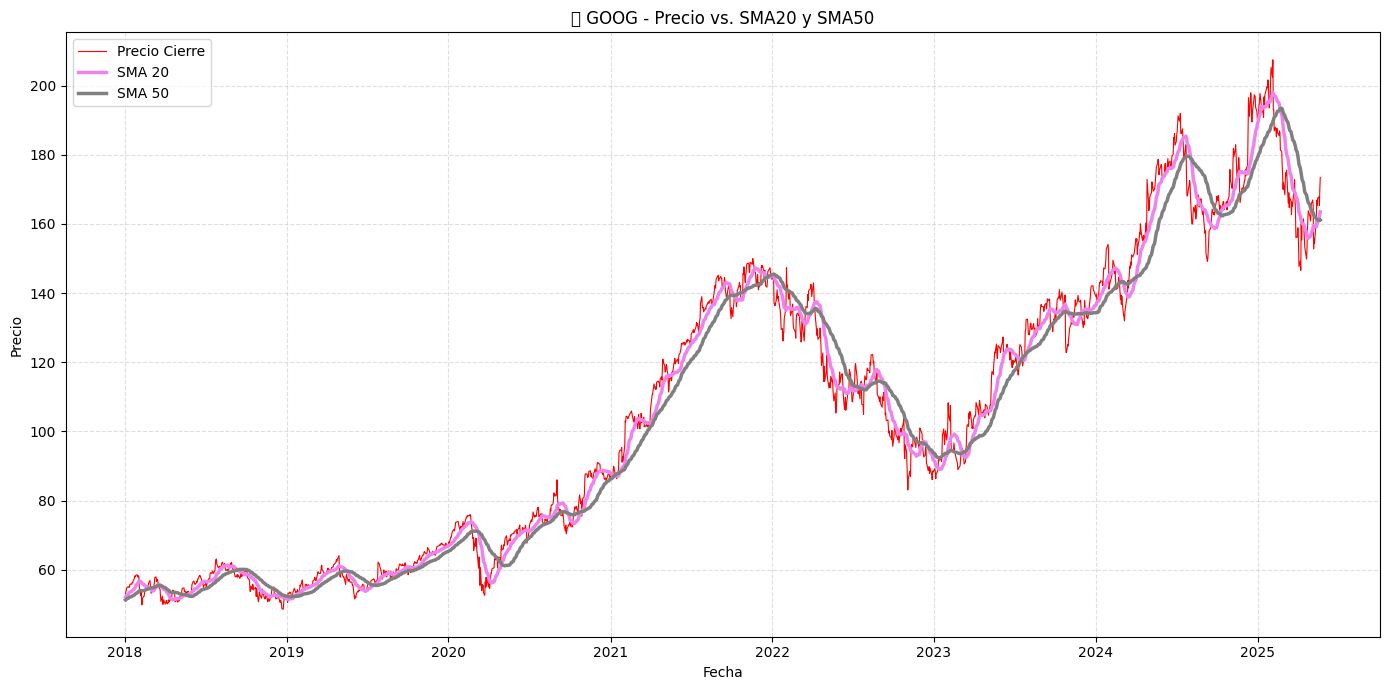

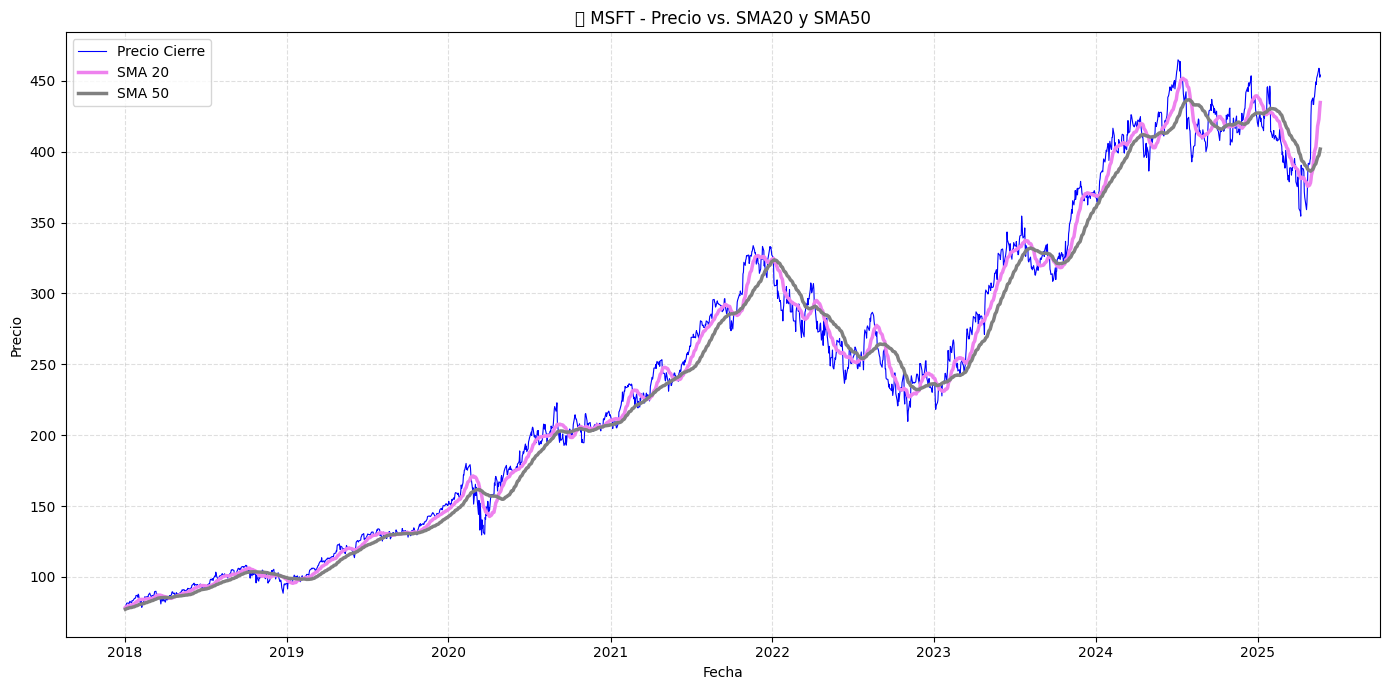

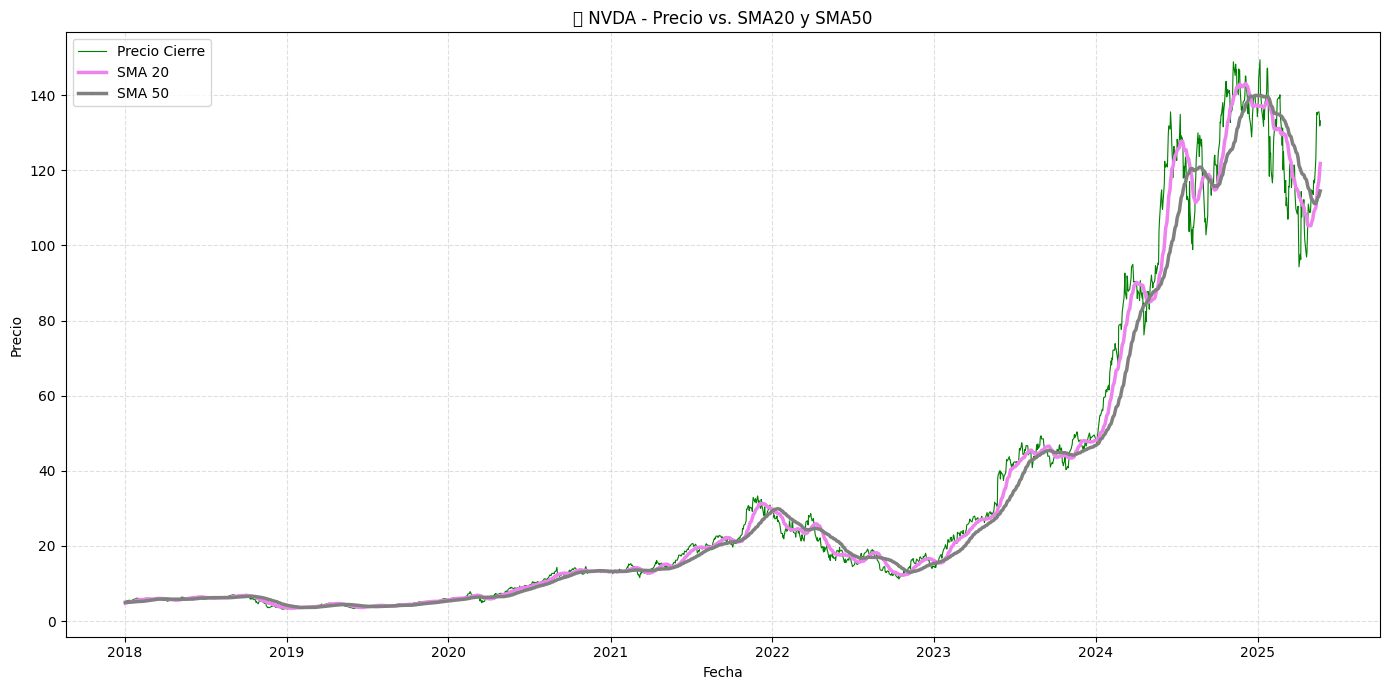

In [22]:
# Ejecutar
sma_precios_df = get_sma_y_precios_empresas_clave()
sma_precios_df

# Asegurar formato de fecha
sma_precios_df['date'] = pd.to_datetime(sma_precios_df['date'])

# Colores personalizados por ticker
ticker_colores = {
    'MSFT': 'blue',
    'AAPL': 'black',
    'AMZN': 'orange',
    'GOOG': 'red',
    'NVDA': 'green'
}

# Graficar por acción
for ticker in sma_precios_df['ticker'].unique():
    df = sma_precios_df[sma_precios_df['ticker'] == ticker]

    plt.figure(figsize=(14, 7))
    plt.plot(df['date'], df['close'], label='Precio Cierre', color=ticker_colores[ticker], linewidth=0.8)
    plt.plot(df['date'], df['sma_20'], label='SMA 20', color='violet', linewidth=2.5) 
    plt.plot(df['date'], df['sma_50'], label='SMA 50', color='grey', linewidth=2.5)

    plt.title(f"📊 {ticker} - Precio vs. SMA20 y SMA50")
    plt.xlabel("Fecha")
    plt.ylabel("Precio")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()





# 📊 Análisis de Cruces SMA20 vs. SMA50 en 5 Acciones Clave

### ⚫Apple (AAPL)

- **Tendencia**: Fuerte tendencia alcista desde 2019 hasta finales de 2021 y nuevo rally desde 2023.
- **Cruces**: Múltiples cruces dorados (SMA20 > SMA50) anticipan subas sostenidas.
- **Utilidad de SMA**: Muy útil para capturar cambios de tendencia, con señales limpias.

---

### 🟧 Amazon (AMZN)

- **Tendencia**: Volátil, con tramos alcistas hasta 2021, luego lateralidad con caídas parciales.
- **Cruces**: Cruces dorados a veces generaron falsas señales durante fases laterales.
- **Utilidad de SMA**: Eficaz en fases claras de tendencia, menos en consolidaciones.

---

### 🟥 Google (GOOG)

- **Tendencia**: Similar a AAPL, con rally fuerte post-2020 y correcciones suaves.
- **Cruces**: La SMA20 se adelanta bien a cambios de dirección; cruces confiables.
- **Utilidad de SMA**: Herramienta sólida para identificar puntos de entrada/salida.

---

### 🟦 Microsoft (MSFT)

- **Tendencia**: Fuerte crecimiento, leve desaceleración post-2022.
- **Cruces**: Claros cruces dorados y de muerte reflejan con precisión los ciclos.
- **Utilidad de SMA**: Muy confiable en este activo para seguir la tendencia.

---

### 🟩 NVIDIA (NVDA)

- **Tendencia**: Explosiva al alza desde 2023, tras consolidación prolongada.
- **Cruces**: Cruces dorados en 2023 preceden movimientos exponenciales.
- **Utilidad de SMA**: Altamente efectiva para capturar grandes impulsos.

---

## 🧠 Conclusión General

- La combinación **SMA20 y SMA50** es muy efectiva para detectar señales técnicas de cruce en activos con fuerte tendencia.
- En acciones muy volátiles (ej. AMZN), puede haber ruido que lleve a señales erróneas.
- Las señales de cruce son más confiables en entornos direccionales, especialmente con confirmación de volumen o tendencia del sector.



## 📅 03.06 Impacto de Eventos Macroeconómicos en Sectores Clave (2018-2025)

C:\Users\Agus\AppData\Local\Temp\ipykernel_17512\3348436574.py:44: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Agus\Desktop\PFM\Proyecto_Final\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


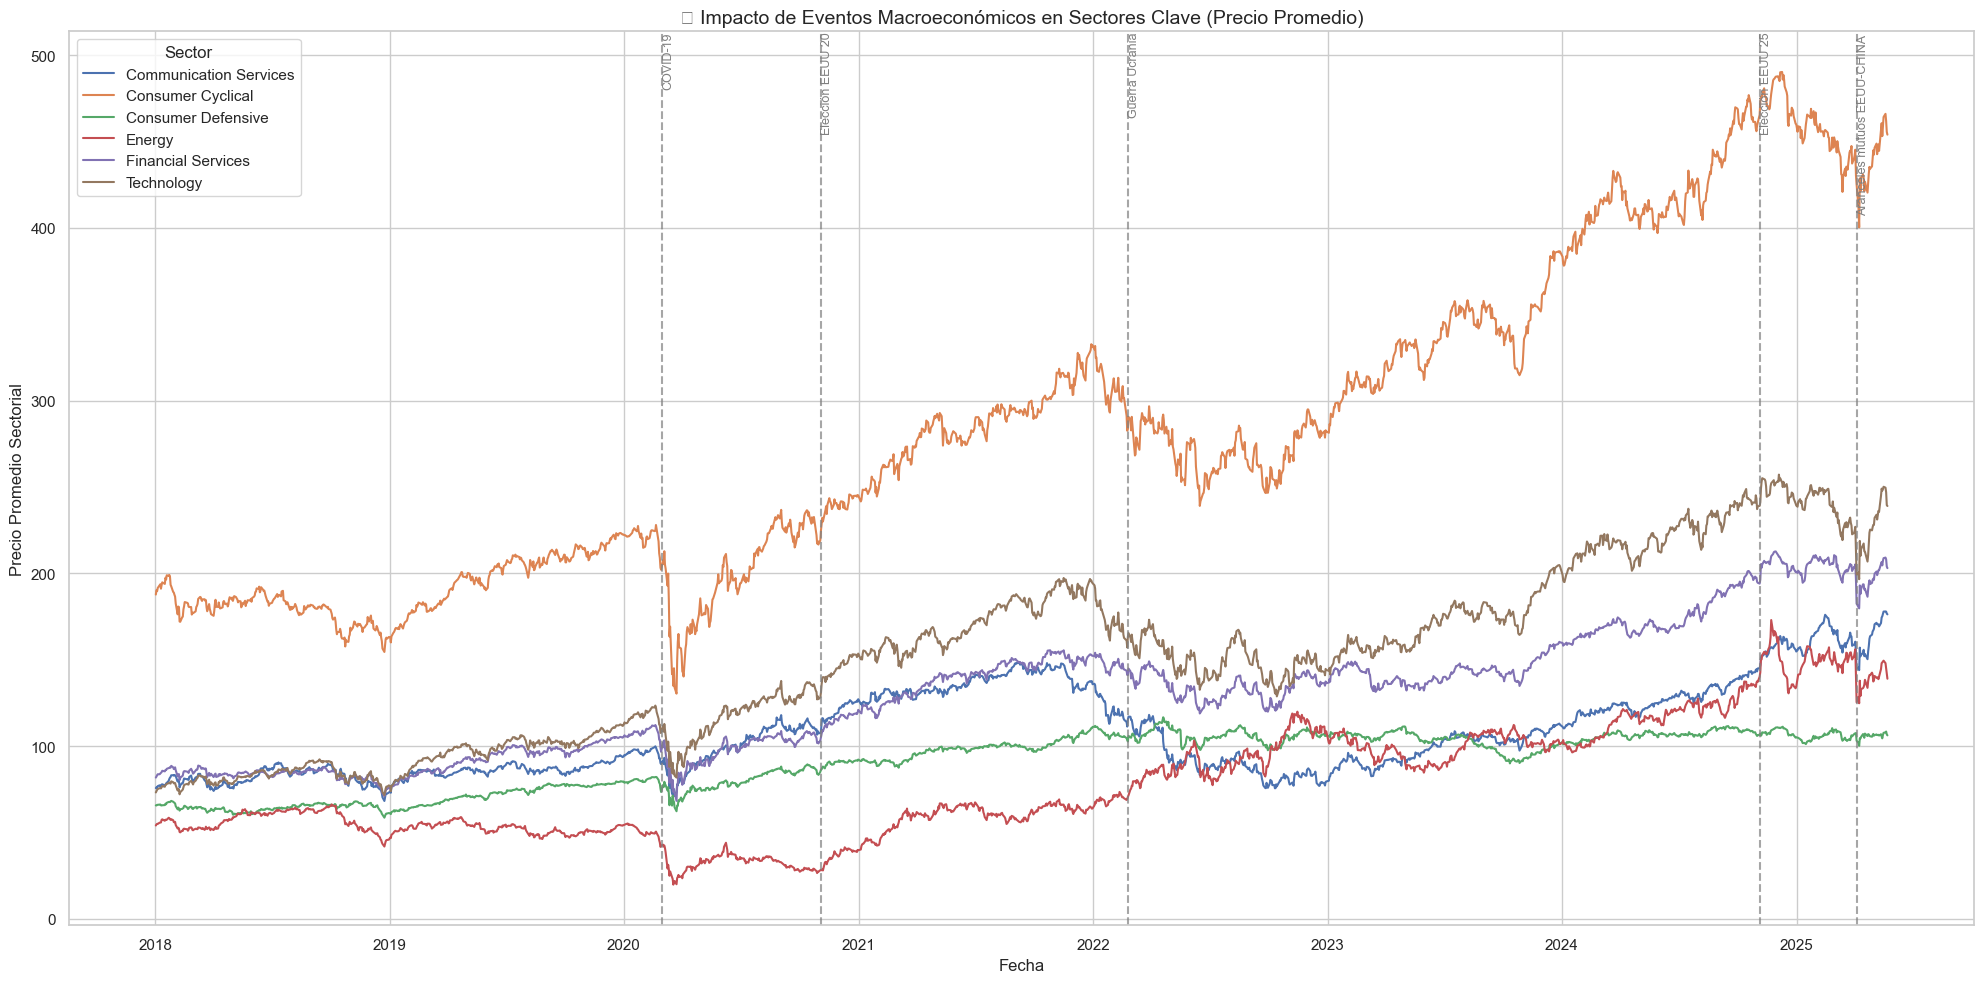

In [23]:


# Ejecutar
precios_sector_df = get_precios_sectoriales()
precios_sector_df


# Suponiendo que precios_sector_df ya fue obtenido con la query del usuario:
# Simulación mínima para evitar errores durante la ejecución
# En ejecución real: precios_sector_df = get_precios_sectoriales()

# Asegurar que las fechas están en datetime
precios_sector_df['date'] = pd.to_datetime(precios_sector_df['date'])

# Eventos a marcar
eventos = {

    'COVID-19': '2020-03-01',
    'Elección EEUU 20': '2020-11-03',
    'Guerra Ucrania': '2022-02-24',
    'Elección EEUU 25': '2024-11-05',
    'Aranceles mutuos EEUU-CHINA ': '2025-04-04',

}

# Graficar
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))

for sector in precios_sector_df['sector'].unique():
    df_sector = precios_sector_df[precios_sector_df['sector'] == sector]
    plt.plot(df_sector['date'], df_sector['precio_promedio'], label=sector)

# Líneas de eventos
for nombre, fecha in eventos.items():
    fecha_evento = pd.to_datetime(fecha)
    plt.axvline(fecha_evento, color='gray', linestyle='--', alpha=0.7)
    plt.text(fecha_evento, plt.ylim()[1], nombre, rotation=90,
             verticalalignment='top', fontsize=9, color='gray')

# Estética
plt.title('📅 Impacto de Eventos Macroeconómicos en Sectores Clave (Precio Promedio)', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio Sectorial')
plt.legend(title='Sector')
plt.tight_layout()
plt.show()

## 📅 Impacto de Eventos Macroeconómicos en Sectores Clave (2018-2025)

Este gráfico examina cómo reaccionaron los principales sectores bursátiles ante eventos macroeconómicos recientes. A continuación, se detalla el impacto observado **por evento**.

---

### 🦠 COVID-19 (Marzo 2020)

**Fecha clave:** 2020-03-01  
**Contexto:** Inicio de la pandemia global, colapso económico temporal, cuarentenas masivas.

#### Comportamiento por sector:
- **Todos los sectores** cayeron abruptamente, especialmente en marzo.
- **Technology** cayó, pero mostró **una de las recuperaciones más rápidas y fuertes**, impulsada por la digitalización y trabajo remoto.
- **Consumer Cyclical** también repuntó rápidamente gracias al estímulo fiscal y consumo post-pandemia.
- **Energy** se hundió severamente por la caída de demanda global; la recuperación fue más lenta.
- **Financial Services** bajó por incertidumbre crediticia y tasas en mínimos históricos.
- **Consumer Defensive** mostró **menor caída** inicial, actuando como refugio defensivo.

✅ **Conclusión:** El shock inicial fue fuerte, pero los sectores ofensivos recuperaron más rápido por digitalización y estímulo monetario.

---

### 🗳️ Elección Presidencial EEUU 2020 (Noviembre 2020)

**Fecha clave:** 2020-11-03  
**Contexto:** Victoria de Biden, expectativas de estímulo, política fiscal expansiva.

#### Comportamiento por sector:
- **Technology** y **Communication Services** mantuvieron su tendencia alcista, descontando políticas pro-inversión e infraestructura digital.
- **Financial Services** comenzó a recuperarse, anticipando tasas más altas y control fiscal.
- **Energy** siguió con bajo desempeño, afectado por regulaciones ambientales proyectadas.
- **Consumer Defensive** mantuvo estabilidad sin cambios relevantes.

✅ **Conclusión:** Los sectores de crecimiento extendieron su rally; los cíclicos comenzaron a mejorar por expectativas de inversión pública.

---

### ⚔️ Guerra en Ucrania (Febrero 2022)

**Fecha clave:** 2022-02-24  
**Contexto:** Invasión rusa, disrupción energética, tensiones geopolíticas.

#### Comportamiento por sector:
- **Energy** experimentó un **salto inmediato en precios**, impulsado por la crisis energética global.
- **Technology** y **Communication Services** se vieron más afectados, cayendo por aversión al riesgo y suba de tasas.
- **Financial Services** fue volátil, reflejando incertidumbre macro y tensiones en el sistema financiero global.
- **Consumer Defensive** mostró una buena defensa ante el entorno incierto.

✅ **Conclusión:** Beneficio directo para energía, castigo para sectores sensibles a tasas y estabilidad.

---

### 🗳️ Elección Presidencial EEUU 2024 (Proyección - Noviembre 2024)

**Fecha clave:** 2024-11-05  
**Contexto proyectado:** Cambio o continuidad política, impacto potencial en regulación e impuestos.

#### Comportamiento anticipado:
- **Volatilidad anticipada** en todos los sectores, sin dirección clara aún.
- **Technology** y **Financial Services** podrían reaccionar según expectativas sobre regulación, impuestos corporativos y tasas.

✅ **Conclusión (provisional):** El mercado se posiciona cautelosamente, con sensibilidad a la política económica futura.

---

### 💼 Tensiones Comerciales EE.UU.–China (Abril 2025)

**Fecha clave:** 2025-04-04  
**Contexto:** Escalada de aranceles mutuos, mayor fricción entre potencias, impacto en el comercio internacional y cadenas de suministro.

#### Comportamiento observado:

- **Technology** mostró una **fuerte corrección inmediata**, reflejando preocupaciones sobre la cadena de semiconductores, exportaciones y presión sobre valuaciones.
- **Consumer Cyclical** también **cayó bruscamente**, sensible a aranceles y aumento en costos de importación.
- **Energy** tuvo una **caída significativa**, posiblemente por temores de menor demanda global ante fricción económica.
- **Financial Services** **retrocedió de forma moderada a fuerte**, en línea con mayor incertidumbre macroeconómica y potencial impacto en flujos comerciales.
- **Communication Services** experimentó una **baja clara**, aunque algo más moderada que tecnología.
- **Consumer Defensive** fue el único que se mantuvo relativamente más estable, actuando como refugio defensivo.

✅ **Conclusión:** El evento generó un impacto negativo inmediato y generalizado, con **caídas abruptas en sectores expuestos al comercio global y la tecnología**. La magnitud de la corrección sugiere **alta sensibilidad sistémica** a este tipo de eventos geopolíticos prolongados.


---



